# Описание: 

Анализ данных вакансий сайта HH.ru.

# Цели проекта: 
- выявить различия в предлагаемых вакансиях для аналитиков данных и специалистов по data science;
- выявить наиболее наиболее активных работодателей и их самые распространённые критерии вакансий и требования к соискателям;
- представить рекомендации для работодателей и соискателей.


Целью анализа ставилось выявление описания наиболее типичной вакансии с точки зрения требований к соискателю и условий труда для двух направлений IT-сферы - аналитик данных и data science. Для этого были взяты в работу данные каждой вакансии с учётом описания работы и выставляемых требований.

Данные, полученные от заказчика представляют собой собранные в два excel-файла характеристики каждой вакансии. Обе полученные базы данных были первично проверены и предобработаны при выгрузке для дальнейшего анализа. Для достижения целей было решено анализировать таблицы прознь с объединением промежуточных результатов для наглядности при необходимости.


Ознакомиться с презентацией реультатов можно по ссылке:

https://docs.google.com/presentation/d/1cteF33Jk6rdzDgPJuPZMEjtGFaZPYddVjAwLwI-ctX0/edit?usp=sharing

# Загрузка библиотек и данных

In [1]:
# Импортируем необходимые для работы с данными библиотеки:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt

# Сделаем графики более чёткими и читаемыми:
%config InlineBackend.figure_format = 'retina'

In [2]:
# Загрузка файлов с данными:
data_da = pd.read_excel(r"C:\Users\Абрамки\Desktop\jupyter\Мастерская\Датасет\vacancies_da.xlsx")
data_ds = pd.read_excel(r"C:\Users\Абрамки\Desktop\jupyter\Мастерская\Датасет\vacancies_ds.xlsx")

Ознакомимся с таблицами и типами данных

In [3]:
data_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


In [4]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

- Таблица с данными вакансий аналитиков имеет 20 столбцов и 1801 строку. Названия столбцов корректны и не требуют исправлений. В таблице присутствуют преимущественно строчные данные, которые необходимо проверить на наличие ошибок написания, так же есть числовые столбцы, которые можно перевести в менне ёмкий тип и один столбец с датой и временем размещения вакансии, который можно  сократить до даты.
- Пропуски присутствуют в столбце названия департамента, который не очень важен для анализа, столбцах с заработной платой (следует уделить отдельное внимание) и столбцах перечисления навыков и способностей, которые можно рассмотреть отдельно.

In [5]:
data_ds.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24 10:44:01,https://hh.ru/vacancy/100049339,Открытая,СБЕР,Сбер для экспертов,Новосибирск,Junior (no experince),[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
1,100051447,Data Scientist,2024-05-24 10:58:18,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24 13:15:26,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN


In [6]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

- Таблица с данными вакансий специалистов data science имеет такие же 20 столбцов, но только 974 строки. Названия столбцов корректны и не требуют исправлений. В таблице присутствуют так же преимущественно строчные данные, которые необходимо проверить на наличие ошибок написания, так же есть числовые столбцы, которые можно перевести в менне ёмкий тип и один столбец с датой и временем размещения вакансии, который в рамках анализа можно сократить до даты.
- Пропуски присутствуют в столбце названия департамента, который не очень важен для анализа, столбцах с заработной платой (следует уделить отдельное внимание) и столбцах перечисления навыков и способностей, которые можно рассмотреть отдельно.

# Предварительная обработка данных

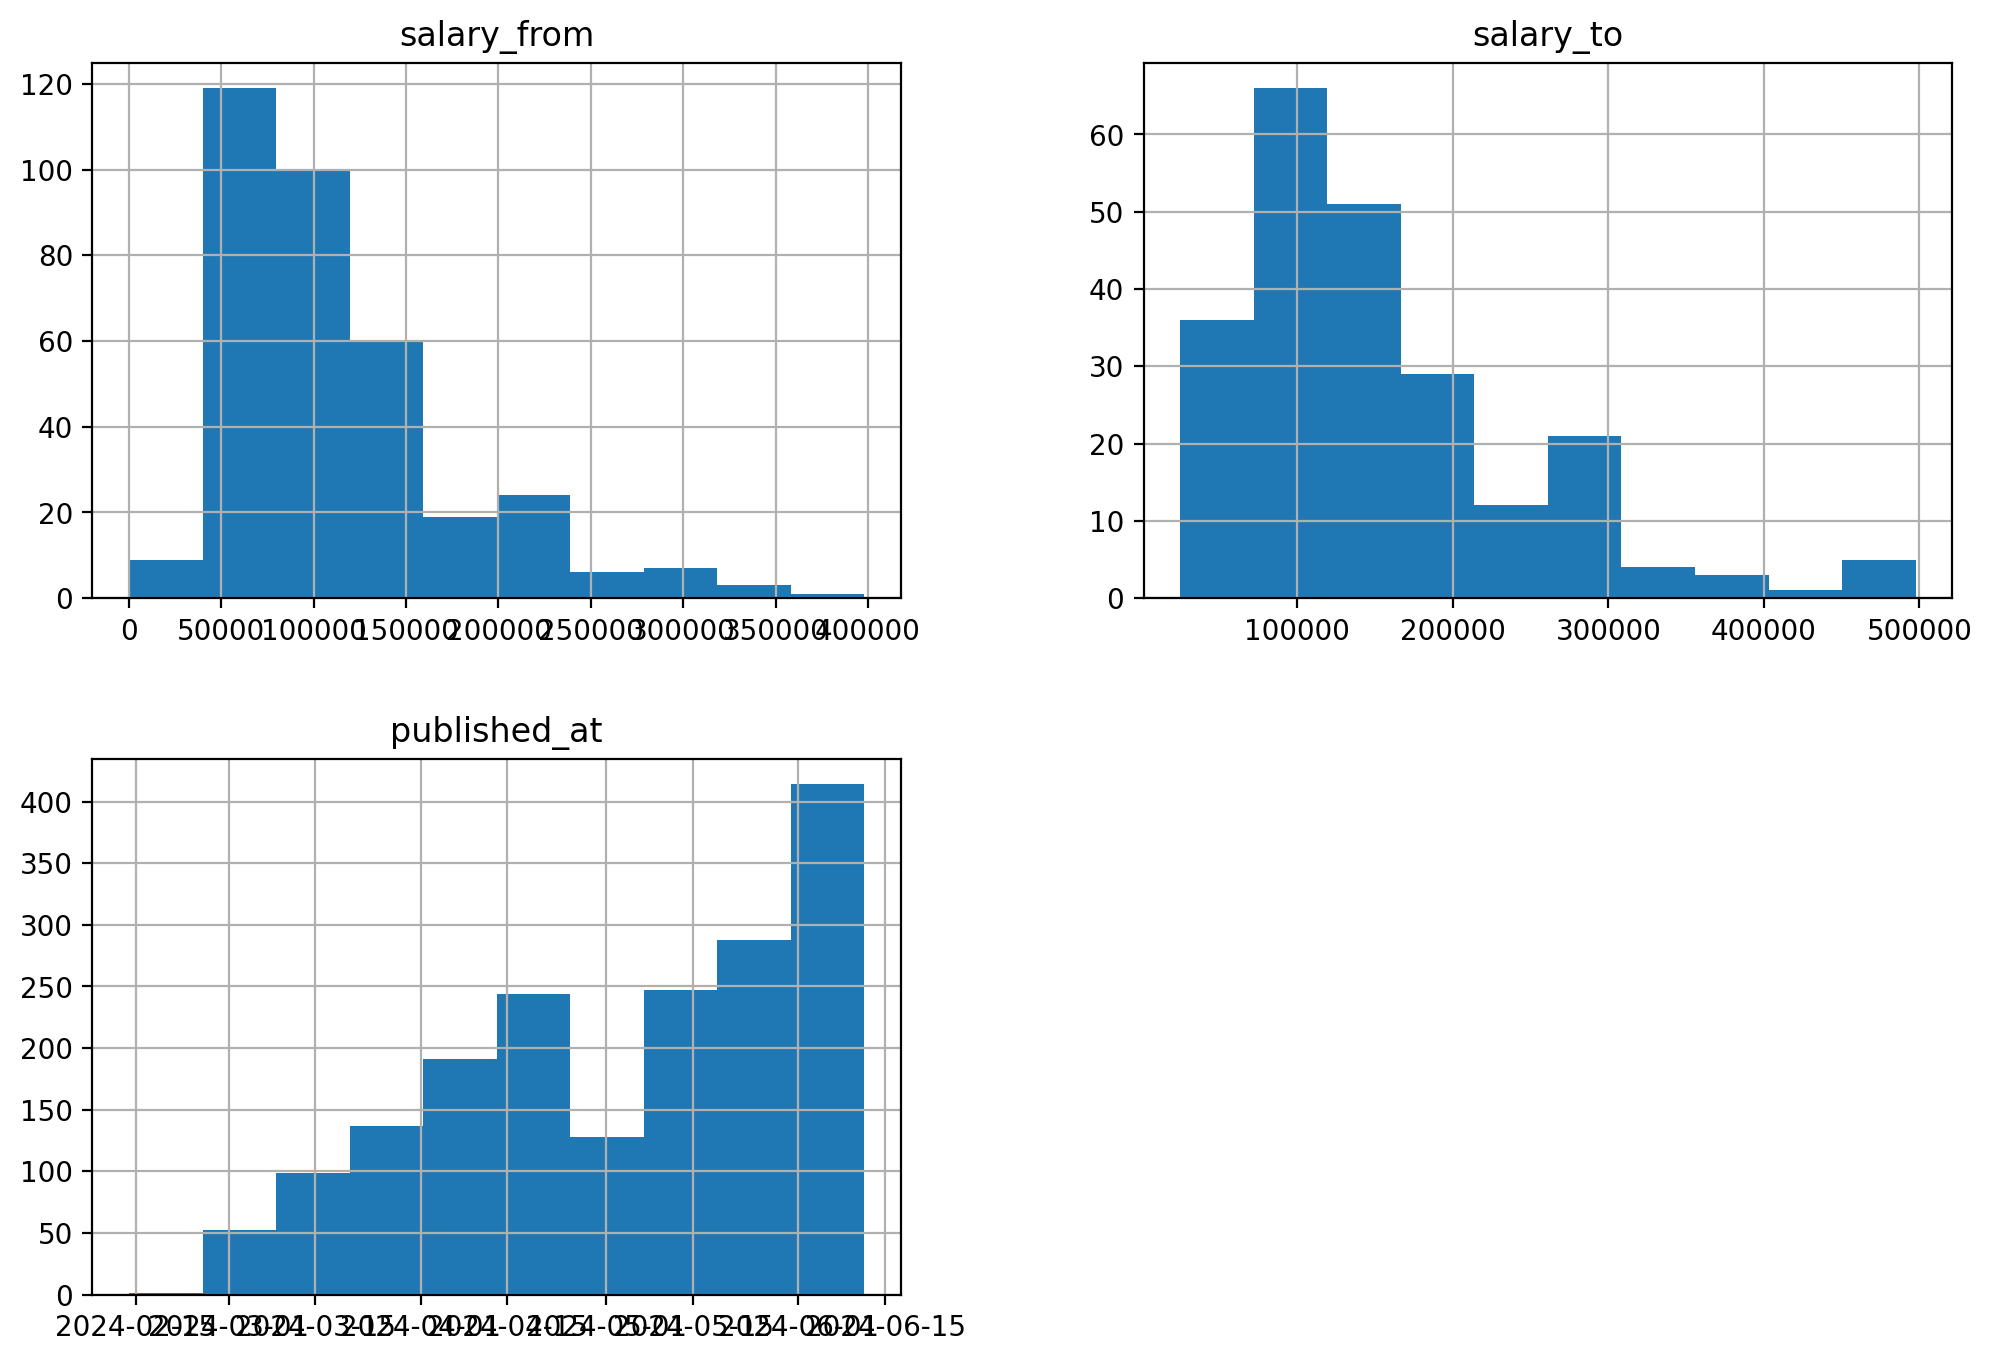

In [7]:
# Гистограмма для всех числовых столбцов позволит выявить данные, которые необходимо предобработать.
data_da[['salary_from', 'salary_to', 'published_at']].hist(figsize=(12, 8))
plt.show()

Гистограмма столбца с датой публикации характерна для наличия выбросов: существенный отступ от нулевого значения по оси даты говорит о присутствии малого кличества очень ранних объявлений. Следует рассмотреть диапазон дат внимательнее. Остальные столбцы не вызывают подозрений, так как распределение выглядит нормальным и логичным.

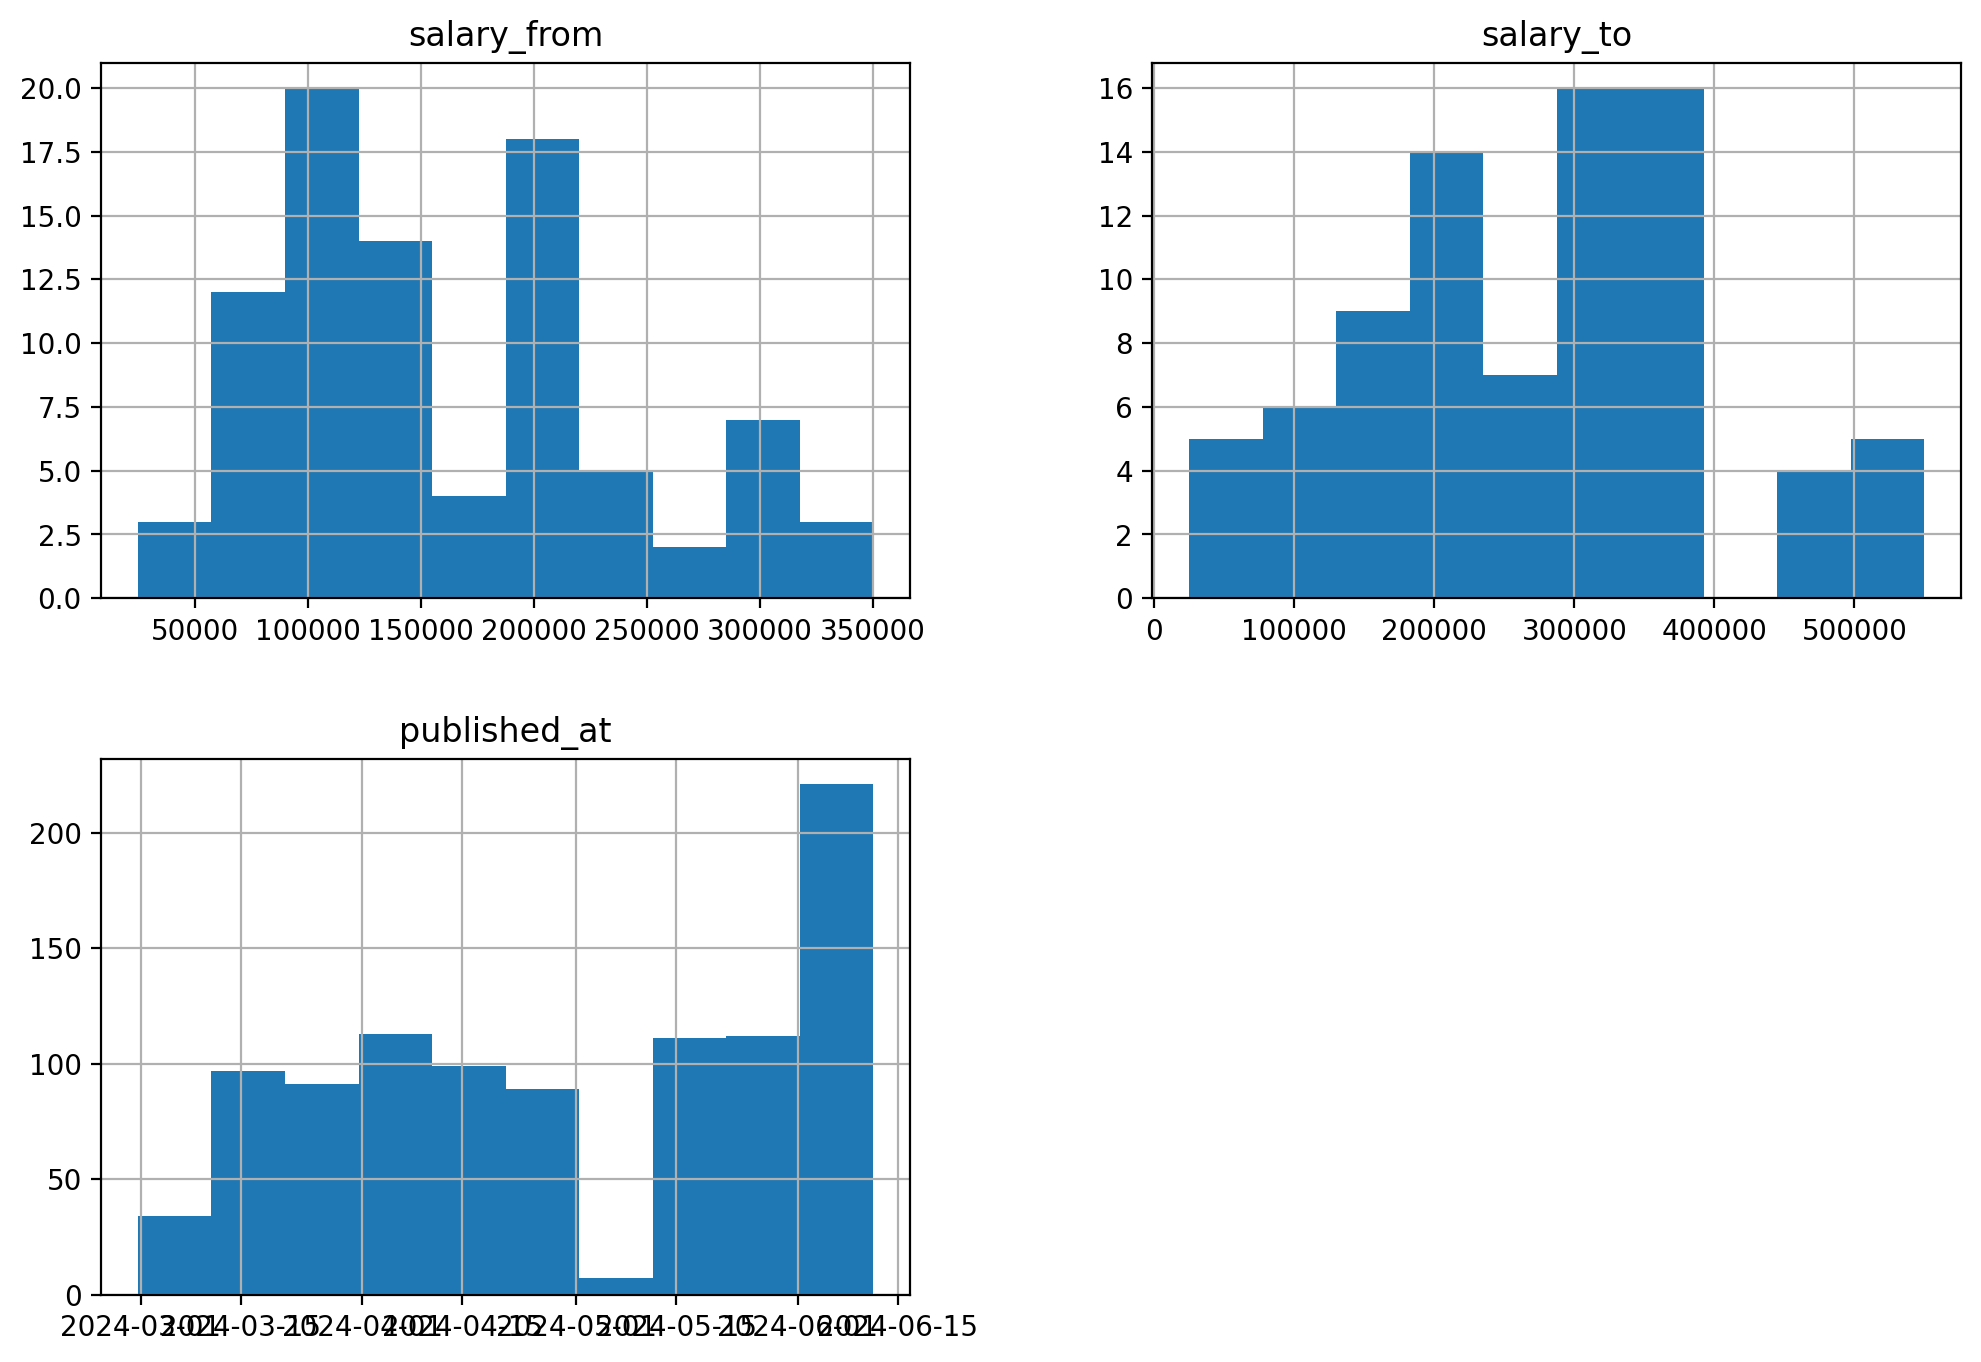

In [8]:
# Гистограмма для всех числовых столбцов позволит выявить данные, которые необходимо предобработать.
data_ds[['salary_from', 'salary_to', 'published_at']].hist(figsize=(12, 8))
plt.show()

Гистограмма даты размещения имеет провал, на который следует обратить внимание при исследовании динамики размещения вакансий. 
Также гистограмма верхнего порога заработной платы возможно имеет выбросы. на которые следует обратить внимание при исследовании.

## Проверка наличия дубликатов

In [9]:
print('Количество дубликатов', data_da.duplicated().sum())
print('Количество дубликатов', data_ds.duplicated().sum())

Количество дубликатов 0
Количество дубликатов 0


Полных дубликатов нет благодаря тому, что данные были первично проверены на этапе выгрузки. Сделаем уточняющую проверку по индивидуальному номеру на случай технической ошибки.

In [10]:
print(len(data_da[data_da.duplicated(['id'], keep=False)]))
print(len(data_ds[data_ds.duplicated(['id'], keep=False)]))

0
0


Для поиска скрытых дубликатов вакансий возьмём основные обязательные параметры вакансий (столбцы с характеристикой работодателя и его требований, геолокацию). 


In [11]:
latent_dupl_da = data_da[['name', 'employer', 'department', 
         'area', 'employment', 'key_skills', 
         'schedule', 'employment', 'description']].duplicated().sum()

print('Количество скрытых дубликатов вакансий:', latent_dupl_da)
print('Доля скрытых дубликатов: ' "%.2f" % (latent_dupl_da/len(data_da['name'])*100),'%')

Количество скрытых дубликатов вакансий: 220
Доля скрытых дубликатов: 12.22 %


In [12]:
latent_dupl_ds = data_ds[['name', 'employer', 'department', 
         'area', 'employment', 'key_skills', 
         'schedule', 'employment', 'description']].duplicated().sum()

print('Количество скрытых дубликатов вакансий:', latent_dupl_ds)
print('Доля скрытых дубликатов: ' "%.2f" % (latent_dupl_ds/len(data_ds['name'])*100),'%')

Количество скрытых дубликатов вакансий: 132
Доля скрытых дубликатов: 13.55 %


Доля скрытых дубликатов слишком велика для удаления. К тому же, нет уверенности, что данные вакансии являются дубликатами. Рботодатель может размещать несколько одинаковых вакансий при наличии нескольких ставок в дивизионе или дублировать их при обновлении вакансии и изменении параметров оплаты труда. 

Найденные дубликаты можно использовать для заполнения пропущенных характеристик заработной платы.

- Рассмотрим дату размещения как возможную подсказку для поиска дубликатов. При размещении вакансии на портале работодатель мог столкнуться с техническими сложностями или не с первой попытки заполнить форму целиком. Тогда при присвоении одной и той же вакансии разных id в дубликаты она не попадёт. Уберём из столбца даты параметр времени и предположим, что все схожие по остальным важным столбцам вакансии, размещённые в один день являются дубликатами. Проверим их наличие в обеих таблицах.

In [13]:
# Удалим указание точного времени из даты размещения вакансии:
data_da['published_at'] = data_da['published_at'].dt.date
data_da['published_at'] = pd.to_datetime(data_da['published_at'], format='%Y-%m-%d')

data_ds['published_at'] = data_ds['published_at'].dt.date
data_ds['published_at'] = pd.to_datetime(data_ds['published_at'], format='%Y-%m-%d')

In [14]:
# Проверим еще раз наличие дубликатов с учётом столбца даты размещения:
latent_dupl_da = data_da[['name', 'published_at', 'employer', 'department', 
         'area', 'employment', 'key_skills',
         'schedule', 'employment', 'description']].duplicated().sum()

print('Количество скрытых дубликатов вакансий:', latent_dupl_da)
print('Доля скрытых дубликатов: ' "%.2f" % (latent_dupl_da/len(data_da['name'])*100),'%')

Количество скрытых дубликатов вакансий: 2
Доля скрытых дубликатов: 0.11 %


Посчитаем эти вакансии технической ошибкой, которая могла возникнуть при заполнении формы размещения на портале, и удалим их из данных. Потеря такого количества данных не скажется на выявлении закономерностей.

In [15]:
data_da = data_da.drop_duplicates(subset=['name', 'published_at', 'employer', 'department', 
         'area', 'employment', 'key_skills',
         'schedule', 'employment', 'description'])

Проверим таблицу вакансий специалистов date science по тем же параметрам.

In [16]:
latent_dupl_ds = data_ds[['name', 'published_at', 'employer', 'department', 
         'area', 'employment', 'key_skills', 
         'schedule', 'employment', 'description']].duplicated().sum()

print('Количество скрытых дубликатов вакансий:', latent_dupl_ds)
print('Доля скрытых дубликатов: ' "%.2f" % (latent_dupl_ds/len(data_ds['name'])*100),'%')

Количество скрытых дубликатов вакансий: 0
Доля скрытых дубликатов: 0.00 %


**Вывод**

- Полных дубликатов нет благодаря тому, что данные были первично проверены на этапе выгрузки.

- Доля скрытых дубликатов, повторяющихся по нескольким основным столбцам составляет 12,2% для данных с вакансиями аналитиков и 13,5% для date science, что слишком много для удаления. Работодатель может размещать несколько одинаковых вакансий при наличии нескольких ставок в дивизионе или дублировать их при обновлении вакансии и изменении параметров оплаты труда. Эти данные решено не удалять. Найденные дубликаты можно использовать для заполнения пропущенных характеристик заработной платы.

- При рассмотрении даты размещения как возможной подсказки для поиска дубликатов было удалено время размещения и обнаружено 0,11% дубликатов. Было решено считать эти вакансии технической ошибкой, которая могла возникнуть при заполнении формы размещения на портале. Эти дубликаты были удалены их из данных. Потеря такого количества данных не скажется на выявлении закономерностей.

## Проверка строчных данных на ошибки и заполнение пропусков.

 - Столбец с названием вакансий имеет большое количество вариаций одних и тех же названий, так как работодатель сам называет вакансию, может добавлять уточнения непосредственно в названии. Поэтому ориентироваться на него не стоит.

- Столбец alternate_url несет в себе ссылку на вакансию на портале HH.ru и формируется автоматически, поэтому отдельной проверки не требует и в анализе не участвует.

- Столбец type характреизует актуальность вакансии и заполняется автоматически, если вакансия активна на портале. Проверим это для обеих таблиц.

In [17]:
print('Статус вакансий для аналитиков:', data_da['type'].unique())
print('Статус вакансий для data science:', data_ds['type'].unique())

Статус вакансий для аналитиков: ['Открытая']
Статус вакансий для data science: ['Открытая']


- Столбец "employer" и следующий за ним "department" хранят названия компаний-работодателей и их струкрурных подразделений соответственно. 

In [18]:
employers_da = data_da['employer'].unique()
sorted(employers_da)

['2050.Лаб',
 '2ГИС',
 '7RedLines',
 'ADVANCE AUTO',
 'ANCOR',
 'AUXO (Атос АйТи Солюшенс энд Сервисез)',
 'AVO.UZ',
 'AWATERA',
 'AWG',
 'Abi',
 'Adequo',
 'AliExpress',
 'Antal Talent',
 'Any Service',
 'AppMagic',
 'Appie.tech',
 'Apple Wild',
 'Aramco Innovations',
 'Aston',
 'Axenix (ранее Accenture)',
 'B2Broker',
 'BND LLC',
 'BRANDPOL',
 'Bayer',
 'Bell Integrator',
 'Bell Integrator Регионы',
 'BestDoctor',
 'Between Exchange',
 'Blissweb',
 'BlockShop',
 'Bonduelle',
 'COZY HOME',
 'Callmedia',
 'Carcade Leasing',
 'Carely',
 'Changellenge',
 'CloudPayments',
 'Coleman Group',
 'D Innovate Group',
 'DIGINETICA',
 'DLS',
 'DNS Головной офис',
 'DNS Технологии',
 'DODO BRANDS (Dodo Pizza, Drinkit, Кебстер)',
 'Data-Driven Lab',
 'Devim',
 'Diamond Personnel R&C',
 'Digex Co',
 'Dopamine Analytics',
 'EGAR TECHNOLOGY, INC.',
 'EMCD Tech LTD',
 'EVYAP International Russia',
 'Employcity',
 'Evercode Lab',
 'Excdev',
 'F.A.C.C.T.',
 'FESCO (ПАО Дальневосточное морское пароходство)

In [19]:
print('Количество работодателей:', len(employers_da))

Количество работодателей: 690


В списке есть ошибки написания некоторых компаний. Кроме того было замечено, что многие компании входят в крупные группы и могут быть обьединены в одного работодателя с уточнением конкретного подразделения или входящей в конгломерат компании в столбце 'department'. Изменим написание компаний для дальнейшей группировки по основному названию группы.

In [20]:
data_da['employer'] = (
    data_da['employer'].replace({
        'Х5 Group':'X5 Group',
        'Х5 IMPORT':'X5 Import',
        '«UZUM TECHNOLOGIES».':'UZUM TECHNOLOGIES',
        '«Баланс-Платформа»':'Баланс-Платформа',
        'СберЗдоровье':'СБЕР Здоровье',
        'СберЛизинг':'СБЕР Лизинг',
        'СберМаркет':'СБЕР Маркет',
        'СберМаркетинг':'СБЕР Маркетинг',
        'СберМобайл':'СБЕР Мобайл',
        'СберОбразование':'СБЕР Образование',
        'СберСити':'СБЕР Сити',
        'СберСпасибо':'СБЕР Спасибо',
        'Страховая компания Сбербанк страхование':'СБЕР СК Сбербанк страхование жизни',
        'СК Сбербанк страхование жизни':'СБЕР СК Сбербанк страхование жизни',
        'SberAutoTech':'СБЕР SberAutoTech',
        'Негосударственный Пенсионный Фонд Сбербанка':'СБЕР НПФ Сбербанка',
        'СБЕРКОРУС':'СБЕР СБЕРКОРУС',
        'РТ-ИНФОРМ':'Ростех РТ-ИНФОРМ',
        'РТ-Информационная безопасность':'Ростех РТ-Информационная безопасность',
        'РСХБ - Страхование жизни':'Россельхозбанк РСХБ - Страхование жизни',
        'РСХБ-Интех':'Россельхозбанк РСХБ - Интех'
        
        })
)

In [21]:
print('Количество работодателей после редактирования:', len(data_da['employer'].unique()))

Количество работодателей после редактирования: 689


Напишем функцию для переноса полного названия подкомпании в столбец department и замены названия компании на название группы конгломерата. Для уточнения вхождения компании в группу были использованы сторонние ресурсы.

In [22]:
def change(data, name):
    data.loc[data['employer'].str.contains(name), 'department'] = data['employer']
    data.loc[data['employer'].str.contains(name), 'employer'] = name

Создадим список общих названий групп, по которым потом будет проще делать анализ. С помощью цикла заменим нужные названия и переместим точные названия в столбец подразделений.

In [23]:
main_nams = ['Bell Integrator', 'DNS', 'Ventra', 'X5',
             'СБЕР', 'Газпром', 'Ингосстрах', 'ДОМ.РФ', 
             'МТС', 'Почта', 'Ренессанс', 
             'Ростелеком', 'Ростех','Россельхозбанк', 
             'Совкомбанк', 'Согласие', 
             'Тест Платформа Пульс', 'Яндекс'   
]

for i in main_nams:
    data = data_da
    name = i
    change(data, name)

In [24]:
print('Доля упорядоченных названий компаний составляет:', 
      "%.2f" % ((689 - len(data_da['employer'].unique()))/689*100),
      '%'
)

Доля упорядоченных названий компаний составляет: 5.66 %


В результате манипуляций с названиями мы смогли упорядочить и сгруппировать 5,5% вакансий, что положительно скажется на дальнейшем исследовании топ-компаний и значимости навыков для них.

Проведём такуюже обработку названий компаний в данных о вакансиях для data sсience специалистов.

In [25]:
employers_ds = data_ds['employer'].unique()
sorted(employers_ds)

['1221Системс',
 '22 Век Плюс',
 '2ГИС',
 '7RedLines',
 'AMarkets',
 'ARK',
 'AVO.UZ',
 'Adwirk Group',
 'Alliesverse',
 'Appfox',
 'Aramco Innovations',
 'Axenix (ранее Accenture)',
 'BND LLC',
 'BestDoctor',
 'Betby',
 'BlockShop',
 'Brandquad',
 'Carcade Leasing',
 'Career Solutions',
 'Changellenge',
 'Cifrasoft',
 'Click',
 'Cloud.ru',
 'DCS',
 'DIGITAL FUTURE SYSTEMS',
 'DLS',
 'DM365',
 'DODO BRANDS (Dodo Pizza, Drinkit, Кебстер)',
 'Data Acquisition',
 'Data-Driven Lab',
 'Datana',
 'Employcity',
 'Eqvanta',
 'Faberlic',
 'Finstar Financial Group',
 'Fundraise Up',
 'GlowByte',
 'Gravity Field',
 'HeadHunter',
 'Headwise LLC',
 'Health & Nutrition',
 'Hi, Rockits!',
 'IBS',
 'Intelligent Analytics',
 'Inventive Retail Group',
 'JuicyScore',
 'Just AI',
 'Kept (Кэпт)',
 'Kokoc Group',
 'LC Group',
 'Lamoda Tech',
 'Lenkep recruitment',
 'MARSHALL',
 'MERLION',
 'Manzana Group',
 'MerlionTech',
 'Multi Family Office',
 'Napoleon IT',
 'Netex24',
 'Nexpanse',
 'NielsenIQ',
 'Novel

In [26]:
data_ds['employer'] = (
    data_ds['employer'].replace({
        'Страховая компания Сбербанк страхование':'СБЕР СК Сбербанк страхование жизни',
        'СК Сбербанк страхование жизни':'СБЕР СК Сбербанк страхование жизни',
        'Сбер Бизнес Софт': 'СБЕР Бизнес Софт' ,
        'SberAutoTech':'СБЕР SberAutoTech',
        'Сбер Лигал': 'СБЕР Лигал' ,
        'СберЛизинг':'СБЕР Лизинг',
        'СберМаркет':'СБЕР Маркет',
        'СберОбразование':'СБЕР Образование',
        'РСХБ-Интех':'Россельхозбанк РСХБ - Интех',
        'РТ-Информационная безопасность':'Ростех РТ-Информационная безопасность',
        })
)


In [27]:
print('Количество работодателей:', len(employers_ds))
print('Количество работодателей после редактирования:', len(data_ds['employer'].unique()))

Количество работодателей: 305
Количество работодателей после редактирования: 304


In [28]:
main_nams = ['X5', 'СБЕР', 'Газпром', 'Ингосстрах', 
             'ДОМ.РФ', 'ВТБ', 'МТС', 'Почта','Ренессанс', 
             'Ростелеком', 'Ростех','Россельхозбанк', 
             'Совкомбанк', 'Согласие'  
]

for i in main_nams:
    data = data_ds
    name = i
    change(data, name)

In [29]:
print('Доля упорядоченных названий компаний составляет:', 
      "%.2f" % ((304 - len(data_ds['employer'].unique()))/304*100),
      '%'
)

Доля упорядоченных названий компаний составляет: 5.26 %


В результате манипуляций с названиями мы смогли упорядочить и сгруппировать 5,26% вакансий, что положительно скажется на дальнейшем исследовании топ-компаний и значимости навыков для них.

- Столбец area заполнялся автоматически по геолокации ванансии. Пропусков тут нет и ошибки в нём можно не искать.

- Столбец experience - это условие требуемого опыта соискателя. В обеих таблицах он имеет одинаковую градацию и заполняется путём выбора предлогаемого варианта из четырёх: 
'Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)'. Для облегчения дальнейшей работы перепишем значения столбца, отбросив диапазоны лет опыта. Это позволит делать категории названиями столбцов и избежать ошибок и дополнительных манипуляций.

In [30]:
data_da['experience'] = (
    data_da['experience'].replace({
        'Junior (no experince)': 'Junior',
        'Junior+ (1-3 years)': 'Junior_plus',
        'Middle (3-6 years)': 'Middle',
        'Senior (6+ years)': 'Senior'
        })
)
data_ds['experience'] = (
    data_ds['experience'].replace({
        'Junior (no experince)': 'Junior',
        'Junior+ (1-3 years)': 'Junior_plus',
        'Middle (3-6 years)': 'Middle',
        'Senior (6+ years)': 'Senior'
        })
)

- Столбец key_skills генерировался и заполнялся из отмеченных работодателем ключевых навыков, в том числе найденных при анализе текста вакансии. Перечисленные навыки записаны в виде списков для каждой вакансии. При отсутствии указанных навыков список формировался пустым.

In [31]:
a = data_da['key_skills'].unique()
print(a)

["['Power BI', 'СУБД', 'Python', 'SQL']"
 "['MS SQL', 'Работа с базами данных', 'MS Excel']"
 "['SQL', 'Power BI', 'СУБД', 'Python', 'Clickhouse', 'BPMN']"
 "['Анализ данных', 'Коммуникация', 'SQL', 'MS Office', 'Управление командой', 'Python', 'Работа с большим объемом информации', 'Навыки презентации', 'Аналитика', 'Умение принимать решения', 'Hadoop', 'Аналитические исследования', 'Pandas', 'Деловая коммуникация', 'Юнит-экономика', 'Нive']"
 "['Документация']" "['Python', 'SQL', 'Математическая статистика']" '[]'
 "['Документация', 'Проактивность', 'Коммуникация']"
 "['Аналитическое мышление']" "['Pandas']"
 "['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'Big Data', 'Data Scientist', 'PostgreSQL', 'Аналитическое мышление', 'MS SQL', 'DataLens', 'Аналитика', 'Статистический анализ', 'Spark', 'Английский язык', 'Python', 'Data Analysis', 'Data Mining', 'QlikView', 'Обучение и развитие']"
 "['Linux', 'SQL', 'поведение пользователей', 'Data Scientist', 'Dask', 'PostgreSQL', 'Google AdWord

Пользоваться этим столбцо не удобно, проверим как при выгрузке был создан столбец key_skills_from_key_skills_field, который формируется из key_skills и текста описания вакансии (там указываются основные обязанности и необходимые навыки для их использования).

In [32]:
data_da['key_skills_from_key_skills_field'] = data_da['key_skills_from_key_skills_field'].fillna('Не указано')
skills_name = data_da['key_skills_from_key_skills_field'].str.split(',').explode().str.strip().str.lower()
print(len(skills_name))
sorted(skills_name.unique())

7730


['199-и',
 '1c',
 '1c: предприятие',
 '1с',
 '1с программирование',
 '1с-битрикс',
 '1с:',
 '1с: бухгалтерия и склад',
 '1с: документооборот',
 '1с: зарплата и кадры',
 '1с: предприятие',
 '1с: предприятие 8',
 '1с: торговля',
 '1с: торговля и склад',
 '223-фз',
 '3624-у',
 '44-фз',
 '483-п',
 '646-п',
 'a/b тестирование',
 'a/b тесты',
 'a/b/n',
 'ab тестирование',
 'ab-test',
 'abc-анализ',
 'access',
 'ad hoc analysis',
 'ad-hoc',
 'adodb',
 'agile',
 'aiohttp',
 'airflow',
 'alation',
 'alm',
 'alteryx',
 'amplitude',
 'anaconda',
 'anaconda3',
 'analysis',
 'analyst',
 'analytic bi',
 'analytical skills',
 'android',
 'anti-fraud',
 'apache airflow',
 'apache nifi',
 'apache spark',
 'apache superset',
 'api',
 'apple search ads',
 'appmetrica',
 'appmetrika',
 'appsflyer',
 'arcgis',
 'arcgis qgis git/gitlab python пространственные базы данных agile',
 'archimate',
 'arenadata',
 'arenadatadb (greenplum)',
 'arendata',
 'atlassian confluence',
 'atlassian jira',
 'aws redshift',


Заменим некоторые позиции, имеющие разные названия, но описывающие один и тот же навык или характеристику.

In [33]:
skills_name = skills_name.replace({
    '1c':'1c',
    '1c: предприятие':'1c',
    '1с':'1c',
    '1с программирование':'1c',
    '1с-битрикс':'1c',
    '1с:':'1c',
    '1с: бухгалтерия и склад':'1c',
    '1с: документооборот':'1c',
    '1с: зарплата и кадры':'1c',
    '1с: предприятие':'1c',
    '1с: предприятие 8':'1c',
    '1с: торговля':'1c',
    '1с: торговля и склад':'1c',
    'работа с выставленными счетами в 1с':'1c',
    'знание 1с':'1c',
    'a/b тесты':'a/b тестирование',
    'ab тестирование':'a/b тестирование',
    'ab-test':'a/b тестирование',
    'ab-test':'a/b тестирование',
    'а/бх тесты':'a/b тестирование',
    'а/в-тестирования':'a/b тестирование',
    'тестирование':'a/b тестирование',
    'access':'ms access',
    'ad-hoc':'ad hoc analysis',
    'appmetrika':'appmetrica',
    'arendata':'arenadata',
    'bi инструменты':'bi',
    'bi-инструменты':'bi',
    'bi-система':'bi',
    'аналитик bi':'bi',
    'визуализация':'bi',
    'analytic bi':'bi',
    'визуализация данных':'bi',
    'инструменты bi':'bi',
    'bigdata':'big data',
    'cистемы управления базами данных':'субд',
    'datalense':'yandex datalens',
    'datalens':'yandex datalens',
    'yandex data lens':'yandex datalens',
    'erp systems':'erp',
    'erp-системы на базе 1с':'erp',
    'google таблицы':'google sheets',
    'greenplam':'greenplum',
    'greenplumdb':'greenplum',
    'jira (желательно)':'jira',
    'jupyter hab':'jupiter',
    'jupyter notebook':'jupiter',
    'matolib':'matplotlib',
    'microsoft access':'ms access',
    'microsoft power bi':'ms power bi',
    'excel':'ms excel',
    'ехсеl':'ms excel',
    'ms excel (vba':'ms excel',
    'знание excel':'ms excel',
    'мс excel':'ms excel',
    'продвинутый пользователь ms excel':'ms excel',
    'работа в excel':'ms excel',
    'olap':'ms olap',
    'olap (online analytical processing)':'ms olap',
    'olap инструменты':'ms olap',
    'olap-кубы':'ms olap',
    'база данных: olap':'ms olap',
    'база данных: oracle':'oracle',
    'oracle bi':'oracle',
    'oracle db':'oracle',
    'oracle exadata':'oracle',
    'oracle pl/sql':'oracle',
    'oracle primavera':'oracle',
    'oracle siebel crm':'oracle',
    'panda':'pandas',
    'phyton':'python',
    'posgresql':'postgresql',
    'postgres':'postgresql',
    'power bi':'ms power bi',
    'power point': 'ms powerpoint',
    'power query)':'power query',
    'powerbi':'ms power bi',
    'powerbl':'ms power bi',
    'powerquery': 'power query',
    'qlicksense':'qlik sense',
    'qlickview':'qlik sense',
    'qlik':'qlik sense',
    'qlikview':'qlik sense',
    'quick sense':'qlik sense',
    'roe':'roi',
    'sql-запросы':'sql',
    'sql.':'sql',
    'аналитик':'анализ',
    'аналитика':'анализ',
    'аудиторские проверки':'аудит',
    'база данных':'базы данных',
    'данных':'базы данных',
    'основы баз данных':'базы данных',
    'работа с базами данных':'базы данных',
    'бюджет': 'бюджетирование',
    'витрины':'витрины данных',
    'внимательность к деталям' :'внимательность',
    'деловая переписка':'деловая коммуникация',
    'деловое общение':'деловая коммуникация',
    'знание ms office':'ms office',
    'знание офисных программ':'ms office',
    'офисные программы':'ms office',
    'уверенный пользователь пк (ms office)':'ms office',
    'умение работать с программами word':'ms office',
    'маркетинговая аналитика':'маркетинговый анализ',
    'маркетинговые исследования':'маркетинговый анализ',
    'нive':'hive',
    'оптимизация бизнес процессов':'оптимизация бизнес-процессов',
    'отчеты':'отчетность',
    'подготовка отчетов':'отчетность',
    'ведение отчетности':'отчетность',
    'навыки составления отчетности':'отчетность',
    'подготовка презентаций':'навыки презентации',
    'проведение презентаций':'навыки презентации',
    'дашборд':'построение дашбордов',
    'дашборды':'построение дашбордов',
    'dashboard':'построение дашбордов',
    'разработка дэшбордов':'построение дашбордов',
    'создание дашбордов':'построение дашбордов',
    'сlickhouse':'clickhouse',
    'сводные таблицы':'ms excel',
    'сводные таблицы excel':'ms excel',
    'система управления базами данных':'субд',
    'cистемы управления базами данных':'субд',
    'статистика':'статистический анализ',
    'математическая статистика':'статистический анализ',
    'классическое машинное обучение':'машинное обучение',
    'mashine learning':'машинное обучение',
    'теория вероятностей':'теория вероятности',
    'хранилище данных':'хранилища данных',
    'разработка хранилищ':'хранилища данных',
    'корпоративное хранилище данных':'хранилища данных',
    'построение хранилищ данных':'хранилища данных',
    'анализ бизнес-процессов':'анализ бизнес показателей',
    'бизнес-анализ':'анализ бизнес показателей',
    'анализ доходности':'анализ бизнес показателей',
    'анализ конкурентной среды':'конкурентная аналитика',
    'анализ рисков':'анализ бизнес показателей',
    'оценка рисков':'анализ бизнес показателей',
    'исследования рынка':'анализ рынка',
    'анализ текущих финансовых показателей':'анализ финансовых показателей',
    'аналитика больших массивов данных':'анализ данных',
    'аналитика данных':'анализ данных',
    'поведение пользователей':'аналитика по клиентам',
    'аналитика продаж':'анализ продаж',
    'аналитические исследования':'анализ данных',
    'аналитические способности':'аналитические навыки',
    'аналитический склад ума':'аналитические навыки',
    'аналитическое мышление':'аналитические навыки',
    'маркетинговая аналитика':'маркетинговый анализ',
    'маркетинговые исследования':'маркетинговый анализ',
    'ml':'моделирование',
    'ml модели':'моделирование',
    'ml-моделирование':'моделирование',
    'ml-прогнозирование':'моделирование',
    'моделирование баз данных':'моделирование',
    'моделирование бизнес процессов':'моделирование',
    'создание моделей':'моделирование',
    'финансовое моделирование':'моделирование',
    'экономическое моделирование':'моделирование',
})

In [34]:
skills = skills_name.unique()

In [35]:
print(len(skills))
skills

622


array(['sql', 'ms power bi', 'python', 'субд', 'базы данных', 'ms sql',
       'ms excel', 'bpmn', 'clickhouse', 'ms office', 'hadoop', 'hive',
       'анализ данных', 'навыки презентации',
       'работа с большим объемом информации', 'анализ',
       'умение принимать решения', 'управление командой',
       'деловая коммуникация', 'не указано', 'статистический анализ',
       'обучение и развитие', 'data mining', 'английский язык',
       'анализ бизнес показателей', 'data analysis', 'linux',
       'data scientist', 'qlik sense', 'big data', 'yandex datalens',
       'spark', 'postgresql', 'ltv', 'appsflyer', 'facebook',
       'apple search ads', 'google adwords', 'автоматизация etl',
       'аналитика по клиентам', 'b2c', 'pandas', 'dask', 'sklearn',
       'airflow', 'bigquery', 'прогнозирование', 'etl',
       'аналитические навыки', 'tableau', 'торговая площадка',
       'маркетплейс', 'bi', 'a/b тестирование', 'opencv', 'deep learning',
       'pytorch', 'администрирование баз

In [36]:
print('Доля упорядоченных названий навыков составляет:', 
      "%.2f" % ((7730 - 622)/7730*100),
      '%'
)

Доля упорядоченных названий навыков составляет: 91.95 %


Теперь подсчёт наиболее популярных среди запросов работодателей навыков и знаний станет легче.

Рассмотрим вторую таблицу тем же способом.

In [37]:
data_ds['key_skills_from_key_skills_field'] = data_ds['key_skills_from_key_skills_field'].fillna('Не указано')
skills_name_ds = data_ds['key_skills_from_key_skills_field'].str.split(',').explode().str.strip().str.lower()
print(len(skills_name_ds))
sorted(skills_name_ds.unique())

3694


['- умение читать и разбирать статьи о новых архитектурах и подходах',
 'a/b',
 'a/b тестирование',
 'a/b тесты',
 'a/b-experiments',
 'agile',
 'agile project management',
 'ai',
 'ai/ml',
 'airflow',
 'al',
 'amocrm',
 'analytical skills',
 'apache airflow',
 'apache hive',
 'api',
 'arcgis qgis git/gitlab python пространственные базы данных agile',
 'arima',
 'atlassian confluence',
 'atlassian jira',
 'attention mechanism',
 'aws',
 'basel',
 'bash',
 'bert',
 'big data',
 'bokeh',
 'boosting',
 'c++',
 'c/c++',
 'caffe',
 'cassandra',
 'catboost',
 'chatgpt',
 'churn prediction',
 'ci/cd',
 'ci\\cd',
 'classic ml',
 'clearml',
 'clickhouse',
 'clustering',
 'cnn',
 'cntk',
 'computer vision',
 'computervision',
 'confluence',
 'crm',
 'cv',
 'cистемы управления базами данных',
 'dashboards',
 'data analysis',
 'data engineer',
 'data mining',
 'data sceince',
 'data science',
 'data scientist',
 'datalens',
 'decision tree',
 'deep learning',
 'devops',
 'digital marketing',
 'dja

In [38]:
skills_name_ds = skills_name_ds.replace({
    'a/b':'a/b тестирование',
    'a/b тесты':'a/b тестирование',
    'a/b-experiments':'a/b тестирование',
    'ав-тестирование':'a/b тестирование',
    'agile project management':'agile',
    'airflow': 'apache airflow',
    'ci\\cd':'ci/cd',
    'computervision':'computer vision',
    'cистемы управления базами данных':'субд',
    'субдд: ms sql postgresql oracle':'субд',
    'dashboards':'дашборд',
    'data analysis':'анализ данных',
    'аналитика':'анализ данных',
    'аналитик':'анализ данных',
    'data sceince':'data science',
    'doker':'docker',
    'elasticsearch':'elastic search',
    'english':'английский язык',
    'fluent english':'английский язык',
    'excel':'ms excel',
    'jupyter notebook':'jupiter',
    'machine learning':'машинное обучение',
    'понимание принципов обучения':'машинное обучение',
    'математическая статистика':'статистический анализ',
    'статистика':'статистический анализ',
    'mathematical statistics':'статистический анализ',
    'прикладная статистика':'статистический анализ',
    'matlab':'matplotlib',
    'oracle pl/sql':'oracle',
    'базовые знания sql':'sql',
    'sql.':'sql',
    'pd':'pandas',
    'владение pandas':'pandas',
    '\uf02d владение pandas':'pandas',
    'опыт работы с nlp':'nlp',
    'nlp модели':'nlp',
    'natural language processing':'nlp',
    'уверенное владение python и основными ml-библиотеками':'python',
    'pyton':'python',
    '\uf02d владение python и основными ml-библиотеками':'python',
    'postgres':'postgresql',
    'scikit-learn':'scikit learn',
    'sns':'seaborn',
    'time series analysis':'time series',
    'power bi':'ms power bi',
    'бизнес-анализ':'анализ бизнес показателей',
    'аналитик':'анализ данных',
    'аналитика':'анализ данных',
    'аналитические исследования':'аналитические навыки',
    'аналитический склад ума':'аналитические навыки',
    'аналитическое мышление':'аналитические навыки',
    'риск аналитика':'анализ рисков',
    'риск менеджмент':'анализ рисков',
    'риски':'анализ рисков',
    'оценка рисков':'анализ рисков',
    'портфельные риски':'анализ рисков',
    'аналитический склад ума':'аналитическое мышление',
    'принципы работы бд':'базы данных',
    'работа с базами данных':'базы данных',
    'высокие коммуникативные навыки':'деловая коммуникация',
    'коммуникабельность':'деловая коммуникация',
    'ии':'искусственный интеллект',
    'нейронная сеть':'нейросети',
    'нейронные сети':'нейросети',
    'нейросеть':'нейросети',
    'neural nets':'нейросети',
    'опыт отладки нейронных сетей и модификации архитектур или создания собственных':'нейросети',
    'оценки deeplearning моделей':'моделирование',
    'создание моделей':'моделирование',
    'валидация моделей':'моделирование',
    'математическое моделирование':'моделирование',
    'statsmodels':'моделирование',
    'ml-моделирование':'моделирование',
    'ml':'моделирование',
    'ml-алгоритмы':'моделирование',
    'ml-моделирование':'моделирование',
    'ml/dl':'моделирование',
    'mle':'моделирование',
    'mlflow':'моделирование',
    'mlops':'моделирование',
    'mlp':'моделирование',
    'работа с большим объемом информации':'работа с большим объемом информации',
    'статистика':'статистический анализ',
    'математическая статистика':'статистический анализ',
    
})

In [39]:
print('Доля упорядоченных названий навыков составляет:', 
      "%.2f" % ((3694 - len(skills_name_ds.unique()))/3694*100),
      '%'
)

Доля упорядоченных названий навыков составляет: 91.58 %


Подобная замена позволит в дальнейшем более подробно изучить список наиболее встречающихся навыков в запросах работодателей.

- Столбцы schedule (график работы) и  employment (тип занятости) так же формировались из выбора среди предложенных порталом вариантов и в дополнительной проверке не нуждаются.

- В столбце description внесено непосредственно представление работодателя и описание вакансии. Из него генерировались ключевые навыки, если они не были указаны работодателем вручную и столбец description_lemmatized.

- Столбцы с уровнем заработной платы имеют характеристики "от", "до" или диапазон, характеризующий категорию. Числовые значения на графиках распределения выглядят логично и объяснимо. Диапазонные значения, хранящиеся в столбце salary_bin выбирались работодателем, поэтому не могут иметь текстовых ошибок.

In [40]:
print(sorted(data_da['salary_bin'].unique()))
print(sorted(data_ds['salary_bin'].unique()))

['Больше 300 тысяч', 'ЗП не указана', 'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч', 'От 200 тысяч до 300 тысяч']
['Больше 300 тысяч', 'ЗП не указана', 'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч', 'От 200 тысяч до 300 тысяч']


Стоит отметить, что именно в этих столбцах наибольшее количество пропусков, поэтому в первую очередь стоит взять для анализа информацию из столбца с диапазоном заработной платы, который заполнен весь. Улучшить качество заполненных диапазонов можно проверкой категории "ЗП не указана". Если работодатель отметил верхний или нижний порог, можно отталкиваться от них и указать соответствующую категорию. Даже если при личном собеседовании работнику будет назначена ЗП, меняющая категори, первично при рассмотрении вакансси он будет опираться на заполненные работодателем "от" и "до".

In [41]:
# Сгруппируем таблицу по категориям ЗП и подсчитаем их общее количество и в интересующих нас столбцах размера ЗП:
data_da.groupby('salary_bin').agg({'name':'count', 'salary_to':'count', 'salary_from':'count'})

,name,salary_to,salary_from
salary_bin,,,
Больше 300 тысяч,28,28,22
ЗП не указана,1571,0,194
Меньше 100 тысяч,68,68,54
От 100 тысяч до 200 тысяч,96,96,56
От 200 тысяч до 300 тысяч,36,36,22


Группировка категорий по верхней границе не выявила не заполненных диапазонов. Зато 194 вакансии имеют нижний порог, обозначенный работодателем, но не имеют указанной категории.

In [42]:
print('Доля требующих изменений категорий составляет:', 
      "%.2f" % (194/1573*100),
      '%'
)

Доля требующих изменений категорий составляет: 12.33 %


С помощью цикла и условий диапазонов присвоим категории для имещих нижний порог ЗП вакансий в тех случаях, если стоит "ЗП не указана". Так как мы имеем две таблицы, воспользуемся функцией.

In [43]:
def change(data):
    pd.options.mode.chained_assignment = None
    for i in data.index:
        if data['salary_bin'][i] == 'ЗП не указана':
            if data['salary_from'][i] < 100000:
                data['salary_bin'][i] = 'Меньше 100 тысяч'
            if 200000 > data['salary_from'][i] >= 100000:
                data['salary_bin'][i] = 'От 100 тысяч до 200 тысяч'
            if 300000 > data['salary_from'][i] >= 200000:
                data['salary_bin'][i] = 'От 200 тысяч до 300 тысяч'
            if data['salary_from'][i] >= 300000:
                data['salary_bin'][i] = 'Больше 300 тысяч'

data = data_da
change(data)

Проверим работу цикла: в первых строках таблицы были указаны нижние пороги, но категория ЗП была не указана.

In [44]:
data_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100039284,Открытая,DNS,DNS Головной офис,Владивосток,Junior,"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior,"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24,https://hh.ru/vacancy/100042705,Открытая,DNS,DNS Головной офис,Владивосток,Junior_plus,"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


In [45]:
data_da.groupby('salary_bin').agg({'name':'count', 'salary_to':'count', 'salary_from':'count'})

,name,salary_to,salary_from
salary_bin,,,
Больше 300 тысяч,32,28,26
ЗП не указана,1377,0,0
Меньше 100 тысяч,168,68,154
От 100 тысяч до 200 тысяч,169,96,129
От 200 тысяч до 300 тысяч,53,36,39


Рассмотрим ситуацию с таблицей вакансий специалистов data science.

In [46]:
# Сгруппируем таблицу по категориям ЗП и подсчитаем их общее количество и в интересующих нас столбцах размера ЗП:
data_ds.groupby('salary_bin').agg({'name':'count', 'salary_to':'count', 'salary_from':'count'})

,name,salary_to,salary_from
salary_bin,,,
Больше 300 тысяч,41,41,25
ЗП не указана,892,0,39
Меньше 100 тысяч,8,8,3
От 100 тысяч до 200 тысяч,13,13,10
От 200 тысяч до 300 тысяч,20,20,11


Ситуация аналогична и в 39 случаях необходимо заменить значение категории.

In [47]:
print('Доля требующих изменений категорий составляет:', 
      "%.2f" % (39/892*100),
      '%'
)

Доля требующих изменений категорий составляет: 4.37 %


In [48]:
# Воспользуемся функцией ранжирования и заменим некорректные данные:
data = data_ds
change(data)

# Проверим изменения в таблице:
data_ds.head(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100049339,Стажер Data Science (Новосибирск),2024-05-24,https://hh.ru/vacancy/100049339,Открытая,СБЕР,СБЕР,Новосибирск,Junior,[],Полный день,Стажировка,sberseasons - оплачиваемая программа стажирово...,sberseasons оплачивать программа стажировка ра...,NaN,NaN,ЗП не указана,Не указано,NaN,NaN
1,100051447,Data Scientist,2024-05-24,https://hh.ru/vacancy/100051447,Открытая,Бюро кредитных историй Скоринг Бюро,NaN,Москва,Junior_plus,"['Python', 'Hadoop', 'Machine Learning', 'Рабо...",Удаленная работа,Полная занятость,бюро кредитных историй «скоринг бюро» является...,бюро кредитный история скоринг бюро являться к...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Big Data, Python, Spark, Hadoop, ...",Pandas,"Документация, Аналитическое мышление"
2,100070495,ML Engineer / Data Scientist,2024-05-24,https://hh.ru/vacancy/100070495,Открытая,ГК ФСК,NaN,Москва,Junior_plus,"['Python', 'PyTorch', 'Machine Learning', 'Doc...",Полный день,Полная занятость,о компании и команде: группа компаний фск – мн...,компания команда группа компания фск многопроф...,NaN,NaN,ЗП не указана,"Python, PyTorch, ML, Docker, NLP, Pandas, SQL,...",NaN,NaN
3,100076648,Team Lead Data Science,2024-05-24,https://hh.ru/vacancy/100076648,Открытая,СБЕР,СБЕР,Москва,Middle,[],Полный день,Полная занятость,наша команда разрабатывает модели машинного об...,наш команда разрабатывать модель машинный обуч...,NaN,NaN,ЗП не указана,Не указано,NaN,NaN
4,100077910,Data Analyst / Data Scientist,2024-06-08,https://hh.ru/vacancy/100077910,Открытая,Итсен,NaN,Москва,Middle,"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...",Полный день,Полная занятость,мы ищем талантливого middle data analyst / dat...,искать талантливый middle data analyst data sc...,350000.0,NaN,Больше 300 тысяч,"Python, SQL, Обучение и развитие, Data Mining,...",NaN,Аналитическое мышление


In [49]:
data_ds.groupby('salary_bin').agg({'name':'count', 'salary_to':'count', 'salary_from':'count'})

,name,salary_to,salary_from
salary_bin,,,
Больше 300 тысяч,44,41,28
ЗП не указана,853,0,0
Меньше 100 тысяч,17,8,12
От 100 тысяч до 200 тысяч,28,13,25
От 200 тысяч до 300 тысяч,32,20,23


**Вывод**

- В ходе предварительной обработки были последовательно рассмотрены все столбцы. Заполняемые автоматически методом выбора при заполнении анкеты вакансии заренее установленной категории значения не требуют изменений.
- Столбец "employer" и следующий за ним "department", хранящие названия компаний-работодателей и их струкрурных подразделений соответственно, имели ошибки написания названий. Компании, входящие входят в крупные группы были обьединены в одного работодателя с уточнением конкретного подразделения или входящей в конгломерат компании в столбце 'department'. В результате этих манипуляций мы смогли упорядочить и сгруппировать 5,5% вакансий для таблицы специалистов аналитики данных и 5,26% вакансий для специалистов data science.
- Столбец experience (условие требуемого опыта соискателя) в обеих таблицах имеет одинаковую градацию и заполняется путём выбора предлогаемого варианта из четырёх: 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'. Для облегчения дальнейшей работы значения столбца были переписаны с учетом змеиного языка для дальнейшей категоризации при анализе.

- Столбцы с упоминанием навыков частично заполнялись вручную, частично автоматически из текста вакансии. Для дальнейшего анализа было решено выбрать более полный список для каждой вакансии, который автоматически формировался из опсания. Список навыков для каждой вакансии был занесён в общий отдельный для специалистов список, в написании и названиях навыков и инструментов были исправлены ошибки, проведена замена дублирующих вариантов написания. Таким образом было упорядочено более 91% названий навыков в обеих таблицах.

- Числовые параметры вакансий представлены в виде критериев заработной платы, расположенных в трёх разных столбцах. Для заполнения пропусков в категориях ЗП были проверены ручные вводные данные столбцов верхней и нижней границы ЗП. Для данных аналитиков группировка категорий по верхней границе не выявила не заполненных диапазонов, по нижней выявлено 194 вакансии без  указанной категории. Доля внесённых изменений категорий составляет: 12.33 %. В таблице data science Ситуация аналогична и в 39 случаях необходимо было заменено значение категории, что составило - 4,37%.


# Исследовательский анализ полученных данных


Исследовательский анализ будем проводить на основе количества размещенных вакансий и их доли с учётом того или иного параметра. В рамках задачи интересны стобцы, характеризующие не только работодателя, но и непосредственно условия работы, а так же требования к соискателю.

К характеристикам работодателя можно отнести основные данные компании, разместившей вакансии, (столбец "employer") и город вакансии, в котором расположена компания или её подразделение. Количественные показатели позволят выявить компании и геолокации, наиболее активные в поиске в исследуемый период.

К характеристикам места работы можно отнести график работы, тип занятости, уровень и граничные значения заработной платы. Количественные и процентные значения позволят оценить распространённость того или иного параметра у работодателей и сформировать наиболее часто встречаемую вакансию для обеих специальностей.

К характеристикам соискателя стоит отнести опыт работы и ключевые навыки, запрашиваемые работодателями. На основании количественных характеристик для каждой специализации можно выявить наиболее часто требуемые параметры специалиста.

In [50]:
# Для этого и последующих вычислений создадим функцию comparison(parameter),
# аргументами которой станет интересующий нас параметр вакансии и таблица.
def comparison(parameter_name, parameter_sort, ascending_name):
    da = data_da[[parameter_name, 'name']] # функция отбирёт столбцы, с интересующими нас данными из первой таблицы
    ds = data_ds[[parameter_name, 'name']] # функция отбирёт столбцы, с интересующими нас данными из второй таблицы
    
# сгруппирует их по заданному интересущему нас параметру, подсчитав количество вакансий:
    parameter_count_da = (da.groupby(parameter_name)
                          .agg({'name':'count'})
                          .sort_values((parameter_sort), ascending=ascending_name)
                          .reset_index()
                         )
    parameter_count_ds = (ds.groupby(parameter_name)
                          .agg({'name':'count'})
                          .sort_values((parameter_sort), ascending=ascending_name)
                          .reset_index()
                         )
    
# выделит общее количество вакансий в отдельную переменную для подсчёта доли:
    total_count_da = parameter_count_da['name'].sum()
    total_count_ds = parameter_count_ds['name'].sum()
    
# на основании полученных данных посчитает процент вакансий каждой категории:
    ratio_da = (parameter_count_da['name'] / total_count_da * 100)
    ratio_da = ratio_da.apply(lambda x: f'{x:.2f}').astype(float)
    
    ratio_ds = (parameter_count_ds['name'] / total_count_ds * 100)
    ratio_ds = ratio_ds.apply(lambda x: f'{x:.2f}').astype(float)
    
# на остновании вычислений доли подсчитает разницу для каждого направления по параметру:
    dif_ratio = abs(ratio_da - ratio_ds)
    
# создаст датафрейм для визуализации данных и дальнейшего анализа: 
    parameter_count_fraction = {
        parameter_name: parameter_count_da[parameter_name],
        'count_da':parameter_count_da['name'],
        'ratio_da%':ratio_da,
        'count_ds':parameter_count_ds['name'],
        'ratio_ds%':ratio_ds,
        'dif_ratio': dif_ratio
    }
    parameter_count_fraction = pd.DataFrame(parameter_count_fraction)
# объявит голбальную переменную с сохранённой в ней таблицей данных для дальнейшего анализа: 
    global table
    table = parameter_count_fraction
    
# визуализирует данные о доле вакансий в виде столбчатой диаграммы сравнения долей вакансий:
    plt.figure(figsize=(5, 3))
    index = np.arange(len(parameter_count_fraction[parameter_name]))
    bw = 0.3
    plt.bar(index, parameter_count_fraction['ratio_da%'], bw)  
    plt.bar(index+bw, parameter_count_fraction['ratio_ds%'], bw)
    plt.title('Доля вакансий по '+title_name)
    plt.ylabel('Доля вакансий, %')
    plt.xlabel(parameter_hist_name)
    plt.xticks(index, parameter_count_fraction[parameter_name])
    plt.xticks(rotation=70)
    plt.legend(['аналитик данных', 'data science'])
    

# вернёт переменную с расчётными данными и столбчатую диаграмму:    
    return parameter_count_fraction
    return plt.show()


## Исследование временных характеристик данных

In [51]:
print('Рассматриваемый период размещения вакансий для аналитиков данных: с', 
      data_da['published_at'].min(), 
      'по', 
      data_da['published_at'].max()
     )
print('Рассматриваемый период размещения вакансий для data sciense: с', 
      data_ds['published_at'].min(), 
      'по', 
      data_ds['published_at'].max()
     )

Рассматриваемый период размещения вакансий для аналитиков данных: с 2024-02-13 00:00:00 по 2024-06-11 00:00:00
Рассматриваемый период размещения вакансий для data sciense: с 2024-02-29 00:00:00 по 2024-06-11 00:00:00


При первичном рассмотрении числовых и временных данных было замечено, что в таблице аналитиков возможно наличие выброса в виде очень ранней даты. Рассмотрим более детально вакансии, размещённые раньше 29 февраля 2024 года.

In [52]:
data_da[data_da['published_at'] < '2024-02-29 00:00:00']

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
468,93170672,Разработчик Python / Аналитик данных,2024-02-13,https://hh.ru/vacancy/93170672,Открытая,ЭР-Телеком,NaN,Пермь,Middle,"['pyspark', 'Numpy', 'requests', 'Python', 'Cl...",Удаленная работа,Полная занятость,спас – система проактивного сервиса – помогает...,спасать система проактивный сервис помогать со...,NaN,NaN,ЗП не указана,"Python, Celery, Clickhouse, PostgreSQL, Spark,...",Pandas,NaN


Такая вакансия одна, проверим не является ли она дубликатом среди вакансий этой компании.

In [53]:
data_da.loc[data_da['employer']=='ЭР-Телеком']

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
97,100565834,Ведущий аналитик данных,2024-05-29,https://hh.ru/vacancy/100565834,Открытая,ЭР-Телеком,NaN,Екатеринбург,Junior_plus,"['MS SQL', 'MS PowerPoint', 'Анализ данных', '...",Удаленная работа,Полная занятость,обязанности: планирование доходной части (при...,обязанность планирование доходный часть привле...,100000.0,100000.0,От 100 тысяч до 200 тысяч,"Финансовый анализ, Анализ текущих финансовых п...",NaN,NaN
468,93170672,Разработчик Python / Аналитик данных,2024-02-13,https://hh.ru/vacancy/93170672,Открытая,ЭР-Телеком,NaN,Пермь,Middle,"['pyspark', 'Numpy', 'requests', 'Python', 'Cl...",Удаленная работа,Полная занятость,спас – система проактивного сервиса – помогает...,спасать система проактивный сервис помогать со...,NaN,NaN,ЗП не указана,"Python, Celery, Clickhouse, PostgreSQL, Spark,...",Pandas,NaN
1184,97188599,Аналитик данных,2024-05-15,https://hh.ru/vacancy/97188599,Открытая,ЭР-Телеком,NaN,Пермь,Junior_plus,"['Анализ данных', 'Python', 'Clickhouse', 'Pan...",Удаленная работа,Полная занятость,мы ищем разработчика на python с уверенными ск...,искать разработчик python уверенный скилла dat...,NaN,NaN,ЗП не указана,"Анализ данных, Python, PostgreSQL, Clickhouse,...",Pandas,NaN
1392,98038227,Аналитик данных,2024-04-27,https://hh.ru/vacancy/98038227,Открытая,ЭР-Телеком,NaN,Екатеринбург,Middle,[],Удаленная работа,Полная занятость,эр-телеком – ведущий телекоммуникационный холд...,эра телеком ведущий телекоммуникационный холди...,85000.0,NaN,Меньше 100 тысяч,Не указано,NaN,NaN


Найденный выброс не дубликат. Так как дальнейший анализ будет проводиться помесячно, удаление одной ваканисии не имеет смысла. Также её следует оставить из-за почти полного заполнения полей, что положительно скажется на общем исследовании.

Для анализа динамики размещения вакансий в обеих таблицах следует создать столбец с номером месяца даты публикации.

In [54]:
data_da['month'] = data_da['published_at'].dt.month
data_ds['month'] = data_ds['published_at'].dt.month

,month,count_da,ratio_da%,count_ds,ratio_ds%,dif_ratio
0,2,1,0.06,1,0.10,0.04
1,3,286,15.90,227,23.31,7.41
2,4,490,27.24,295,30.29,3.05
3,5,633,35.19,230,23.61,11.58
4,6,389,21.62,221,22.69,1.07


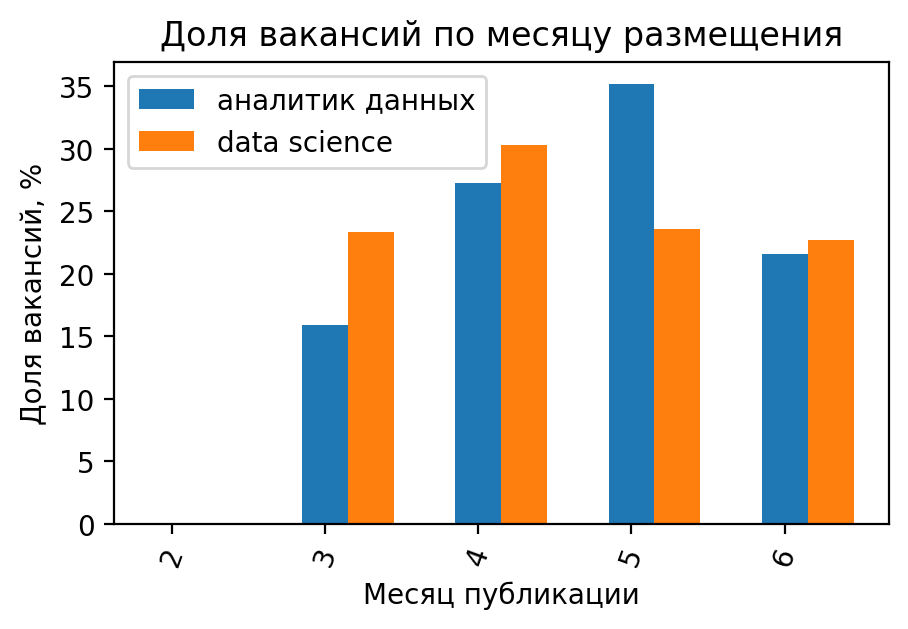

In [55]:
# переменной, включённой в функцию для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'month'
parameter_sort = 'month'
ascending_name = True

# уточним характеристики гистограммы:
parameter_hist_name = 'Месяц публикации'
title_name = 'месяцу размещения'

# вызовем функцию
comparison(parameter_name, parameter_sort, ascending_name)

In [56]:
data_da['week'] = data_da['published_at'].apply(lambda x: x.isocalendar()[1])
data_ds['week'] = data_ds['published_at'].apply(lambda x: x.isocalendar()[1])

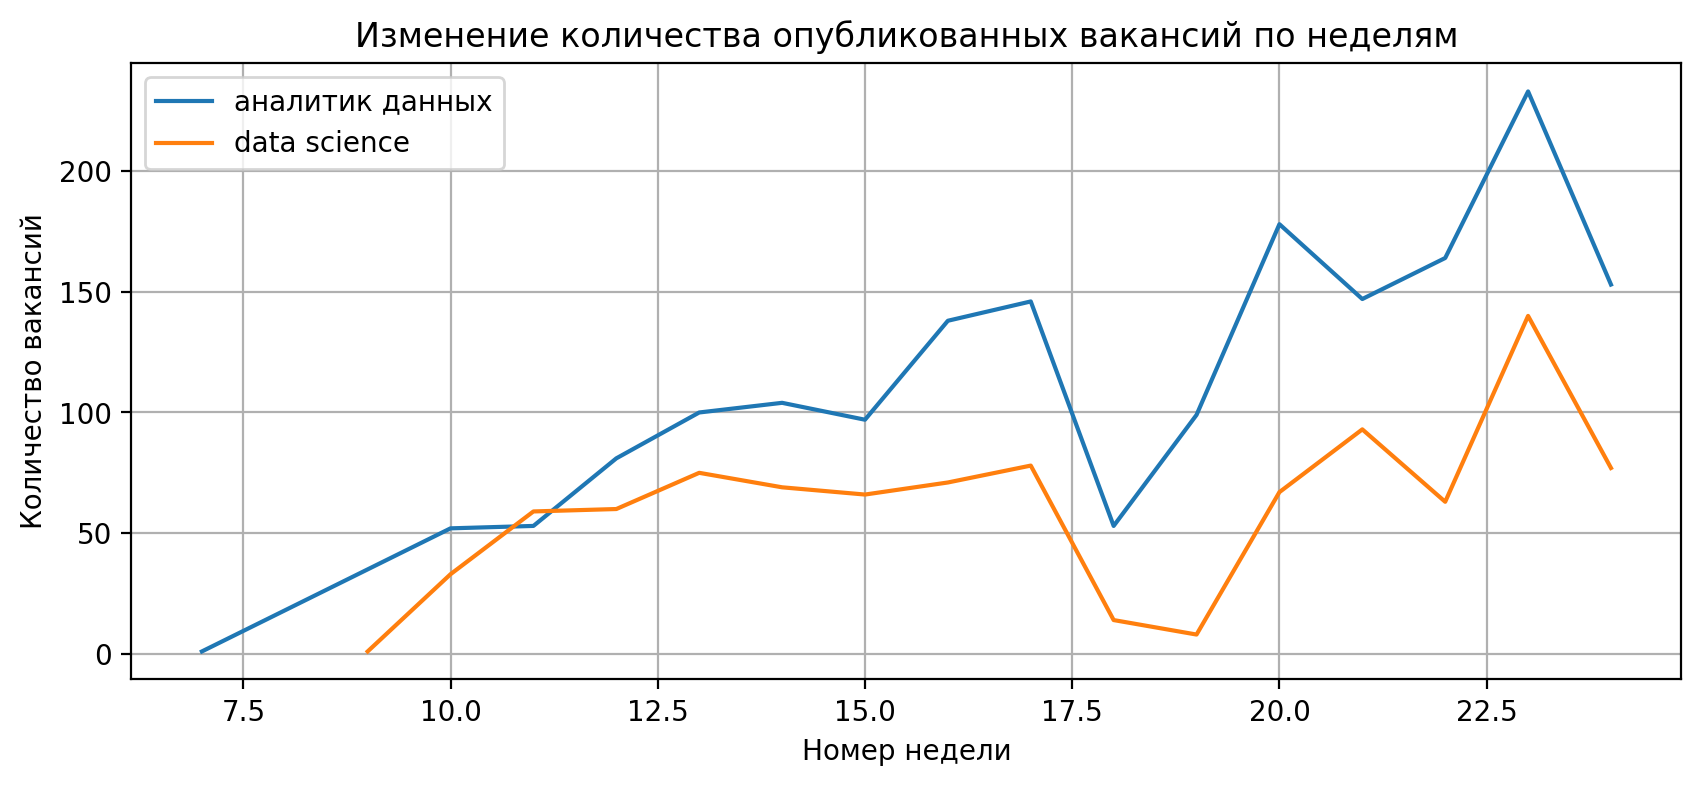

In [57]:
week_counts_da = data_da.groupby('week').agg({'id':'count'}).reset_index()
week_counts_ds = data_ds.groupby('week').agg({'id':'count'}).reset_index()

plt.figure(figsize=(10, 4))
plt.plot( week_counts_da['week'], week_counts_da['id'])
plt.plot( week_counts_ds['week'], week_counts_ds['id'])
plt.grid(True) 
plt.xlabel('Номер недели')
plt.ylabel('Количество вакансий')
plt.title('Изменение количества опубликованных вакансий по неделям')
plt.legend(['аналитик данных', 'data science'])
plt.show()

При рассмотрении по неделям заметно, что в целом динамика колебаний количества вакансий для двух рассматриваемых специальностей схожа. Однако на 11 и 21 неделях можно заметить существенный скачок количества вакансий специалистов data sciense при падении количества вакансий аналитиков данных. Также на 16, 19 и 22 неделях виден рост количества вакансий аналитиков при падении количества вакансий date science. Это может быть связано с публикациями вакансий крупной компании для нескольких подразделений или локаций сразу.

**Вывод**

- Исследуемый период заключается с 29 февраля по 11 июня 2024 года.
- Количество размещаемых вакансий растёт на протяжении всего исследуемого периода. Низкие показатели февраля объяснимы малым количеством исследуемых дней - в данные попали лишь 2 для аналитиков и 1 для data science. То же касается и июня, так как окончание исследуемого периода наступило раньше окончания месяца. Однако уже в течение 11 дней количество объявлений для специалистов data science почти достигло значенпий предыдущего месяца.
- Во все месяцы кроме мая сохраняется тенденция большего количества вакансий для специалистов data science. Однако в мае доля вакансий для аналитиков данных почто в 1,5 раза превысила вторую специальность. 
- При рассмотрении по неделям заметно, что в целом динамика колебаний количества вакансий для двух рассматриваемых специальностей схожа. Однако на 11 и 21 неделях можно заметить существенный скачок количества вакансий специалистов data sciense при падении количества вакансий аналитиков данных. Также на 16, 19 и 22 неделях виден рост количества вакансий аналитиков при падении количества вакансий date science. Это может быть связано с публикациями вакансий крупной компании для нескольких подразделений или локаций сразу.

# Исследование характеристик работодателя и предлагаемой вакансии.

Исследование характеристик работодателя и вакансий в конечной цели должен описать параметры наиболее распространённой вакансии, такие как требуемый опыт и навыки, предлагаемые уровень дохода, условия труда и чаще всеговстречающихся компаний.

## Анализ требуемого опыта среди вакансий аналитиков и data science

Исходя из количества опыта, имеющегося у потенциального сотрудника, все IT-специалисты делятся на молодых специалистов - Junior (без опыта или опыт менее года), Junior+ (1-3 года опыта) и опытных специалистов - Middle (3-6 лет опыта), Senior (более 6 лет опыта). Такое деление позволяет не только варьировать ЗП, но и сказывается на количестве навыков и умений специалистов.

,experience,count_da,ratio_da%,count_ds,ratio_ds%,dif_ratio
0,Junior_plus,1091,60.64,465,47.74,12.90
1,Middle,555,30.85,433,44.46,13.61
2,Junior,141,7.84,44,4.52,3.32
3,Senior,12,0.67,32,3.29,2.62


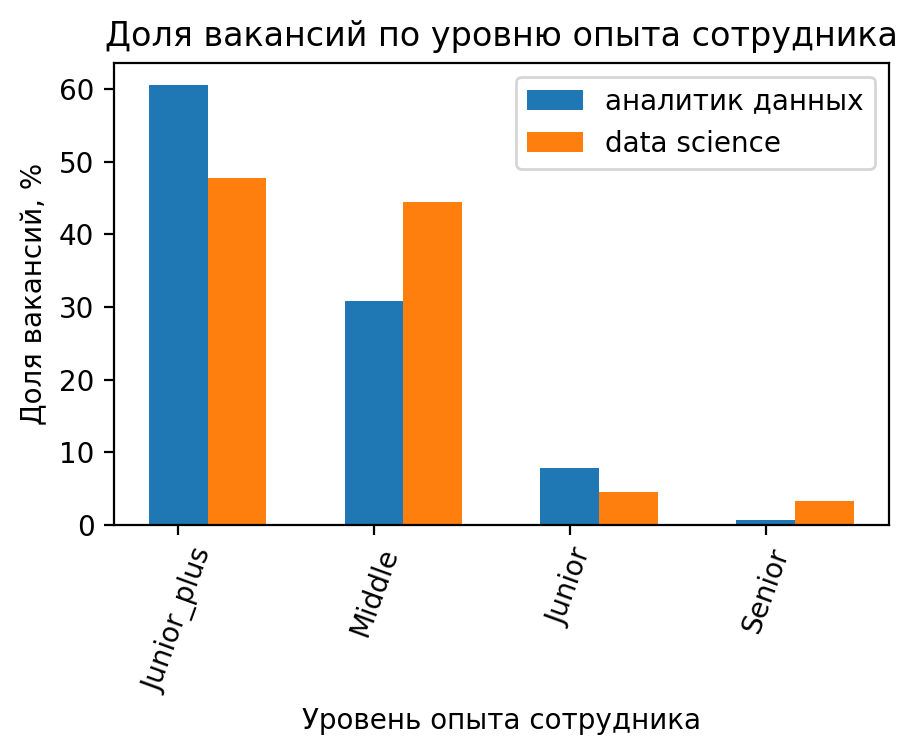

In [58]:
# переменной, включённой в функцию для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'experience'
parameter_sort = 'name'
ascending_name = False
# уточним характеристики гистограммы:
parameter_hist_name = 'Уровень опыта сотрудника'
title_name = 'уровню опыта сотрудника'

# вызовем функцию
comparison(parameter_name, parameter_sort, ascending_name)

В обоих случаях специализации наблюдается максимальное количество запросов для молодых специалистов, имеющий небольшой опыт: 60,58% для аналитиков и 47,74% для data science. Это объяснимо, так как работодателю удобнее нанять уже знакомого с работой сотрудника с хорошим набором навыков, но при этом не обременённого большим опытом в этой области и адаптировать его навыки под свои задачи. В то время как при полном отсутствии опыта есть риск, что времени на обучение и адаптацию уйдёт значительно больше. Поэтому специалисты без опыта работы нанимаются значительно реже для обеих специальностей (7,88% и 4,52% соответственно). Специалистам уровня middle так же предлагается много вакансий в обеих областях (30,88% и 44,46%), так как это наиболее активный работник, обладающий хорошим уровнем знаний и умений. Самые мало-популярные запросы от работодателей приходятся на senior. Скорее всего это связано с меньшим количеством руководящих должностей, которые чаще всего занимают специалисты этого уровня, и возможностью роста внутри компании, когда работодателю не приходится искать стороннего сторудника и должность занимает уже давно работающий в компании повышенный middle. Доли вакансий для наиболее опытных специалистов составляют 0,72% для аналитиков и 3,29% для data science.

При рассмотрении количества вакансий для разных областей направленности было замечено, что вакансий для специалистов data science уровня junior+ и middle примерно равно: 47,74% и 44,46%, в то время как для специалистов в области аналитики данных вакансий уровня middle почти на 30% меньше, чем junoir+. 

При рассмотрении каждого отдельного уровня опыта специалиств можно отметить следующее:
- вакансий для молодых специалистов больше в области аналитики данных почти на 13% для junior+ и на 3% для junior;
- вакансии для midlle-специалистов встречаются в data science почти на 14% чаще, чем в области аналитики данных;
- senior-специалисты чаще необходимы в data science

## Выявление наиболее типичного места работы 

Для выявления и анализа наиболее распространённых характеристик вакансии воспользуемся двумя подходами: в первом случае рассмотрим значения общих количеств объявлений для двух специализаций, во втором разберём влияние на каждый параметр категории соискателя.

Для первого типа анализа создадим функцию, которая предоставит нам таблицу с количествами вакансий для обоих типов направленности в зависимости от интересуещего нас критерия работодателя.

In [59]:
# Зададим функцию, которая
def category(category_name):
# сгруппирует оба датасета по интересующему параметру, подсчитает количество вакансий в каждом и выведет их поубыванию:
    dt_da = data_da.groupby(category_name).agg({'id':'count'}).sort_values(('id'), ascending = False).reset_index()
    dt_ds = data_ds.groupby(category_name).agg({'id':'count'}).sort_values(('id'), ascending = False).reset_index()
    
# перезапишет названия столбцов новых таблиц:
    dt_da.columns = [category_name, 'count_id_da']
    dt_ds.columns = [category_name, 'count_id_ds']
    
# соединит таблицы в одну для дальнейшего анализа результатов:
    resalt = pd.merge(dt_da, dt_ds, how='inner', on=category_name).fillna(0)
    
# создаст столбей с долей разницы количества вакансий:
    resalt['rate'] = ((resalt['count_id_da'] - resalt['count_id_ds'])/(resalt['count_id_da'] + resalt['count_id_ds'])*100)
    resalt['rate'] = resalt['rate'].apply(lambda x: f'{x:.2f}').astype(float)    
# создаст столбцы с долей количества вакансий относительно общего количества для конкретной специальности:    
    resalt['rate_count_da'] = resalt['count_id_da']/sum(resalt['count_id_da'])*100
    resalt['rate_count_da'] = resalt['rate_count_da'].apply(lambda x: f'{x:.2f}').astype(float)
    resalt['rate_count_ds'] = resalt['count_id_ds']/sum(resalt['count_id_ds'])*100
    resalt['rate_count_ds'] = resalt['rate_count_ds'].apply(lambda x: f'{x:.2f}').astype(float)

# выведет результат:
    return resalt

Вторым этапом анализа станет оценка количества вакансий для каждого выбранного параметра в разбивке на категории соискателей по указанному опыту работы. Это удобно сделать на основе сводной таблицы для каждого направления деятельности.

In [60]:
# Зададим функцию, которая
def pivot_category_da(category_name, limit):
# сгруппирует исходные данные по интересующему нас параметру и подсчитает количество вакансий в каждом случае:
    top = data_da.groupby(category_name).agg({'id':'count'}).sort_values(('id'), ascending = False).reset_index()
    top.columns = [category_name, 'count_id_da'] # для удобства переназовёт столбцы
    
# выведет в отдельный список позиции категориии с учётом условия ограничения количества вхождений, задаваемого вручную:
    top_category_da = list(top[category_name].loc[top['count_id_da']>limit])
    
# сделает срез исходных данных по наличию позиций в списке:
    top_data_da = data_da.loc[data_da[category_name].isin(top_category_da)]

# сформирует сводную таблицу и добавит общее количество:
    experience_in_top_da = pd.pivot_table(top_data_da, 
                                      index =  category_name,
                                      columns = 'experience',
                                      values = 'name',
                                      aggfunc = 'count',
                                      fill_value=0, margins=True, observed=False
                                  ).sort_values(by=['All'], ascending = False)
# выведет результат:
    return display(experience_in_top_da)


In [61]:
# Зададим функцию, которая
def pivot_category_ds(category_name, limit):
# сгруппирует исходные данные по интересующему нас параметру и подсчитает количество вакансий в каждом случае:
    top_dt = data_ds.groupby(category_name).agg({'id':'count'}).sort_values(('id'), ascending = False).reset_index()
    top_dt.columns = [category_name, 'count_id_ds'] # для удобства переназовёт столбцы
    
# выведет в отдельный список позиции категориии с учётом условия ограничения количества вхождений, задаваемого вручную:
    top_category_ds = list(top_dt[category_name].loc[top_dt['count_id_ds']>limit])
    
# сделает срез исходных данных по наличию позиций в списке:
    top_data_ds = data_ds.loc[data_ds[category_name].isin(top_category_ds)]
    
# сформирует сводную таблицу и добавит общее количество:
    experience_in_top_ds = pd.pivot_table(top_data_ds, 
                                      index =  category_name,
                                      columns = 'experience',
                                      values = 'name',
                                      aggfunc = 'count',
                                      fill_value=0, margins=True, observed=False
                                  ).sort_values(by=['All'], ascending = False)
# выведет результат:
    return display(experience_in_top_ds)

### Анализ списка работодателей:

С помощью написанных функций рассмотрим список работодателей, наиболее часто размещающих вакансии для обоих направлений. Для удобства восприятия и отсева единичных ваканисй сделаем срез по количеству более 10.

In [62]:
category_name = 'employer'
limit = 10
dt = category(category_name)
# отсечём компании по количеству вакансий ниже 10:
top_dt = dt.loc[(dt['count_id_da']>limit)|(dt['count_id_ds']>limit)].reset_index(drop= True)
top_dt

,employer,count_id_da,count_id_ds,rate,rate_count_da,rate_count_ds
0,СБЕР,264,217,9.77,29.66,32.53
1,WILDBERRIES,43,16,45.76,4.83,2.40
2,Ozon,34,36,-2.86,3.82,5.40
3,Т1,26,19,15.56,2.92,2.85
4,"МАГНИТ, Розничная сеть",24,3,77.78,2.70,0.45
5,МТС,23,8,48.39,2.58,1.20
6,Okko,19,6,52.00,2.13,0.90
7,Газпром,18,35,-32.08,2.02,5.25
8,Яндекс,17,4,61.90,1.91,0.60
9,Ростелеком,17,12,17.24,1.91,1.80


Конгламерат компаний СБЕР находится в лидерах для обоих направлений. Это вполне объяснимо не только количеством компаний, объединённых в единую систему, но и активным развитием IT-направлений в них. Кроме того, не стоит упускать из внимания преимущества, которыми пользуются крупные партнёры портала (автоматическое переразмещение вакансии, продвижение её в поиске, возможность размещения большего количества вакансий и прочие), что может быть не доступно более мелким и узконаправленным компаниями.

Интересно отметить, что преимущественно работодатели запрашивают либо большее количество аналитиков, либо в примерно равных количествах с data science. Исключеснием стали лишь Газпром и Samokat.tech, которые имеют вакансии для data science специалистов в два и шесть раз больше соответственно. Компании МегаФон, билайн и Ozon также имеют чуть больше вакансий для data science, но не значительно больше (11 против 8 для первых двух и 36 против 34 для Ozon). 

В имеющейся базе данных среди 18 наиболее активных работодателей лишь 5 имеют больше вакансий для date science специалистов, нежели для аналитиков, что составляет 27,78%. Это так же объяснимо большей наполненностью базы данных аналитиков, чем date science базы.

Рассмотрим списки работодателей, разместивших более 10 вакансий в каждом направлении по запрашиваемому уровню сосикателя. Ранее мы установили, что чаще всего работодатели ищут Junior+ (1-3 years) и Middle (3-6 years).

In [63]:
category_name = 'employer'
limit = 10
pivot_category_da(category_name, limit)

experience,Junior,Junior_plus,Middle,All
employer,,,,
All,44,401,202,647
СБЕР,13,171,80,264
WILDBERRIES,1,16,26,43
Ozon,2,17,15,34
Банк ВТБ (ПАО),1,24,3,28
Т1,0,5,21,26
"МАГНИТ, Розничная сеть",7,15,2,24
МТС,1,16,6,23
DNS,6,13,0,19


Для аналитиков данных ситуация полностью подтверждает ранее замеченную тенденцию: работодатели чаще всего ищут специалистов с опытом  Junior+ (1-3 years) и Middle (3-6 years). Из них наиболее многочисленными вакансиями стали  Junior+ (1-3 years). Лишь для WILDBERRIES и группы компаний Яндекс запрос на более опытных специалистов превышает запрос на молодых специалистов. В случае Яндекс на момент исследования почти все вакансии соответствовали Middle (3-6 years). Это может быть объяснимо возможностью заполнения ставок обоих уровней Junior выпускниками курсов Практикума. В WILDBERRIES, где молодые специалисты нужны в 37% случаев, предпочтение отдаётся уровню Middle (60% вакансий).

Интересно отметить, что в выборку совсем не попали наиболее опытные специалисты. Это может быть объяснимо наличием в топ-компаниях сильных и уверенных руководителей, набирающих более молодых специалистов для расширения и обновления штата.

In [64]:
# Сделаем срез по уровню опыта:
dt = data_da.loc[data_da['experience'] == 'Senior']
# Выведем сгруппированные по работодателям данные о количестве вакансий:
dt.groupby('employer').agg({'id':'count'}).sort_values(by='id', ascending = False)

,id
employer,
Леруа Мерлен,3
Reinvent Baltics,2
Aramco Innovations,1
B2Broker,1
CloudPayments,1
PayMatrix,1
Spice Agency,1
Мединвестгрупп,1
Секонд Сайт,1


Почти все компании размещали по одной вакансии и лишь Reinvent Baltics имеет две. Наличие у лидера списка Леруа Мерлен четырёх вакансий может говорить о необходимости заполнения штата в разных городах сети или о дублировании вакансии при повторном размещении.

In [65]:
category_name = 'employer'
limit = 10
pivot_category_ds(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
employer,,,,,
All,20,185,200,3,408
СБЕР,12,106,97,2,217
Ozon,4,7,25,0,36
Газпром,0,10,24,1,35
Samokat.tech,1,6,13,0,20
ВТБ,0,14,5,0,19
Т1,0,7,12,0,19
WILDBERRIES,0,2,14,0,16
Lamoda Tech,2,6,4,0,12


Для специалистов data science ситуация немного иная: за исключением нескольких топовых групп компаний (СБЕР, ВТБ, Ростелеком, МегаФон и билайн) большинство запросов от работодателей на Middle (3-6 years), а не на молодых специалистов. Это может объясняться спецификой работы и необходимостью долгого обучения молодых специалистов, к которым многие компании не готовы.

In [66]:
# Сделаем срез по уровню опыта:
dt = data_ds.loc[data_ds['experience'] == 'Senior']
# Выведем сгруппированные по работодателям данные о количестве вакансий:
dt.groupby('employer').agg({'id':'count'}).sort_values(by='id', ascending = False)

,id
employer,
Fundraise Up,3
СБЕР,2
Aramco Innovations,2
"РУСАЛ, Центр подбора персонала",2
Sape,2
Гудфокаст,2
БиАйЭй-Технолоджиз,2
7RedLines,1
ГПМ Партнер,1


Специалистов с высоким уровнем опыта в этом направлении спрашивают чаще, нежели среди аналитиков, однако ожидаемо для руководящих должностей, таких вакансий внутри одной компании очень мало, даже среди лидеров работодателей.

**Вывод:**

- Конгламерат компаний СБЕР находится в лидерах для обоих направлений. Это вполне объяснимо не только количеством компаний, объединённых в единую систему, но и активным развитием IT-направлений в них. Кроме того, крупные партнёры портала могут пользоваться преимуществами в размещении большего числа вакансий.

- Работодатели запрашивают либо большее количество аналитиков, либо в примерно равных количествах с data science. Исключением стали лишь Газпром и Samokat.tech, которые имеют вакансии для data science специалистов в два и шесть раз больше соответственно. Компании МегаФон, билайн и Ozon также имеют чуть больше вакансий для data science, но не значительно больше (11 против 8 для первых двух и 36 против 34 для Ozon).

- В имеющейся базе данных среди 18 наиболее активных работодателей лишь 5 имеют больше вакансий для date science специалистов, нежели для аналитиков, что составляет 27,78%. Это так же объяснимо большей наполненностью базы данных аналитиков, чем date science базы.

- Для специалистов-аналитиков распределение количества вакансий по опыту работы полностью подтверждает ранее замеченную тенденцию: работодатели чаще всего ищут специалистов с опытом Junior+ (1-3 years) и Middle (3-6 years). Из них наиболее многочисленными вакансиями стали Junior+ (1-3 years). Лишь для WILDBERRIES и группы компаний Яндекс запрос на более опытных специалистов превышает запрос на молодых специалистов. В случае Яндекс на момент исследования почти все вакансии соответствовали Middle (3-6 years). Это может быть объяснимо возможностью заполнения ставок обоих уровней Junior выпускниками курсов Практикума. В WILDBERRIES, где молодые специалисты нужны в 37% случаев, предпочтение отдаётся уровню Middle (60% вакансий).

- В выборку топ-работодатей по количеству размещённых вакансий совсем не попали наиболее опытные специалисты. Это может быть объяснимо наличием в топ-компаниях сильных и уверенных руководителей, набирающих более молодых специалистов для расширения и обновления штата. Наличие у лидера списка количества вакансий для Senior, Леруа Мерлен, четырёх вакансий может говорить о необходимости заполнения штата в разных городах сети или о дублировании вакансии при повторном размещении.

- Для специалистов data science ситуация немного иная: за исключением нескольких топовых групп компаний (СБЕР, ВТБ, Ростелеком, МегаФон и билайн) большинство запросов от работодателей на Middle(3-6 years), а не на молодых специалистов. Это может объясняться спецификой работы и необходимостью долгого обучения молодых специалистов.
- Специалистов с высоким уровнем опыта в этом направлении спрашивают чаще, нежели среди аналитиков, однако ожидаемо для руководящих должностей, таких вакансий внутри одной компании очень мало, даже среди лидеров работодателей.

### Анализ уровня заработной платы

Сперва рассмотрим общее количество вакансий для обеих специальностей по уровням заработной платы.

,salary_bin,count_da,ratio_da%,count_ds,ratio_ds%,dif_ratio
0,ЗП не указана,1377,76.54,853,87.58,11.04
1,От 100 тысяч до 200 тысяч,169,9.39,44,4.52,4.87
2,Меньше 100 тысяч,168,9.34,32,3.29,6.05
3,От 200 тысяч до 300 тысяч,53,2.95,28,2.87,0.08
4,Больше 300 тысяч,32,1.78,17,1.75,0.03


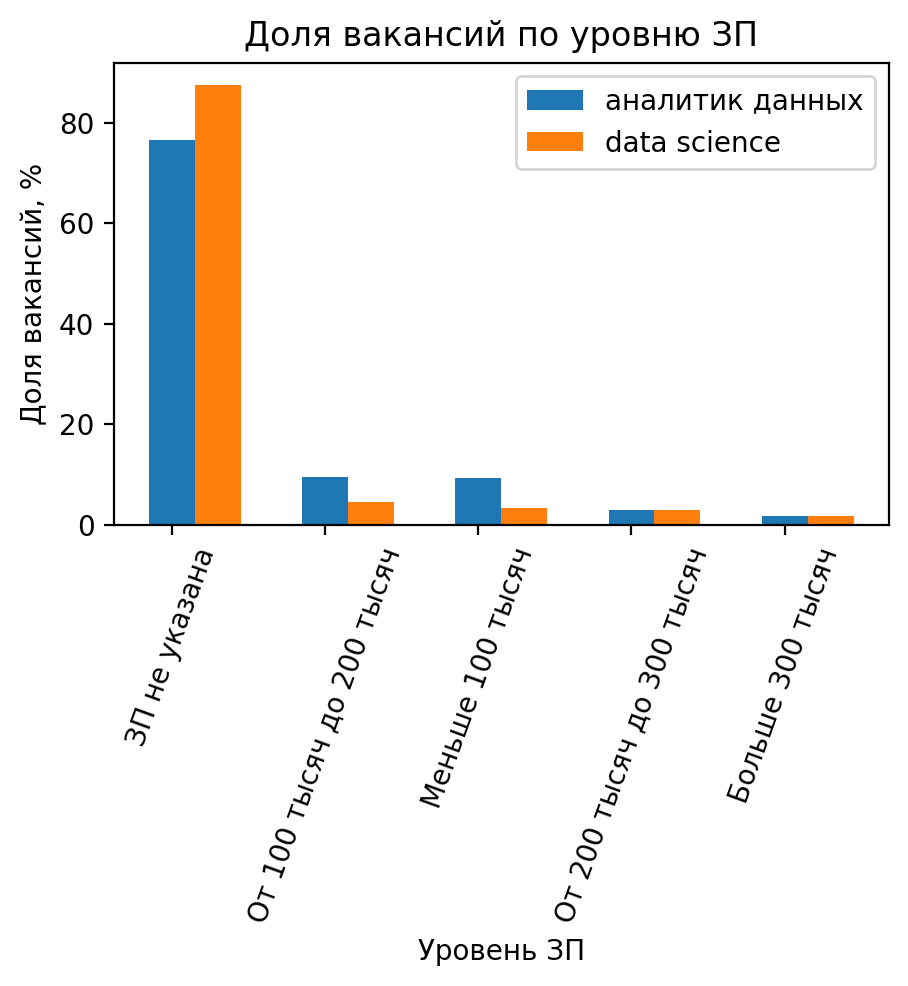

In [67]:
# переменной, включённой в функцию comparison для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'salary_bin'
parameter_sort = 'name'
ascending_name = False
# уточним характеристики гистограммы:
parameter_hist_name = 'Уровень ЗП'
title_name = 'уровню ЗП'

# вызовем функцию comparison
comparison(parameter_name, parameter_sort, ascending_name)

Для специалистов date sciеnse не указана ЗП чаще, чем для аналитиков данных. Из обозначенных диапазонов можно заметить, что до 200 тыс. ЗП чаще указана для аналитиков, а выше - для специалистов date science.

In [68]:
category_name = 'salary_bin'
limit = 0
pivot_category_da(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
salary_bin,,,,,
All,141,1091,555,12,1799
ЗП не указана,75,836,457,9,1377
От 100 тысяч до 200 тысяч,8,123,38,0,169
Меньше 100 тысяч,58,101,9,0,168
От 200 тысяч до 300 тысяч,0,28,22,3,53
Больше 300 тысяч,0,3,29,0,32


Среди аналитиков данных с малым опытом работы ЗП чаще указана при величине менее 200 тыс, в то время как для Middle и Senior специалистов высокие уровни ЗП упоминаются чаще. Это связано напрямую с наличием больших опыта и навыков и готовности работодателя платить за это.

Также замечено, что ЗП не указывается чаще при росте уровня соискателя, что может быть объяснимым желанием работодателя оценивать сосикателя по имеющеимся навыкам, а атакже желанием получить большое количество откликов для возможности широкого выбора потенциального работника.

In [69]:
print('Доля вакансий не указанной ЗП для Junior составляет:', 
      "%.2f" % (76/142*100),
      '%'
)
print('Доля вакансий не указанной ЗП для Junior_plus составляет:', 
      "%.2f" % (836/1091*100),
      '%'
)
print('Доля вакансий не указанной ЗП для Middle составляет:', 
      "%.2f" % (457/555*100),
      '%'
)
print('Доля вакансий не указанной ЗП для Senior составляет:', 
      "%.2f" % (10/13*100),
      '%'
)

Доля вакансий не указанной ЗП для Junior составляет: 53.52 %
Доля вакансий не указанной ЗП для Junior_plus составляет: 76.63 %
Доля вакансий не указанной ЗП для Middle составляет: 82.34 %
Доля вакансий не указанной ЗП для Senior составляет: 76.92 %


In [70]:
category_name = 'salary_bin'
limit = 0
pivot_category_ds(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
salary_bin,,,,,
All,44,433,465,32,974
ЗП не указана,33,377,414,29,853
Больше 300 тысяч,0,17,25,2,44
От 200 тысяч до 300 тысяч,0,14,18,0,32
От 100 тысяч до 200 тысяч,2,17,8,1,28
Меньше 100 тысяч,9,8,0,0,17


Для специалистов date science наблюдается рост количества вакансий с указанным диапазоном ЗП с ростом уровня ЗП. При этом общая закономерность роста числа вакансий с высокой ЗП с ростом уровня опытности сохраняется.

Вычислим средине и медианные диапазоны для каждой категрии опыта сосикателей из тех данных, которые предоставили работодатели в числовых столбцах ЗП "от" и "до".

In [71]:
data_da.groupby('experience').agg({'salary_from':'median', 'salary_to':'median'})

,salary_from,salary_to
experience,,
Junior,60000.0,80000.0
Junior_plus,90000.0,120000.0
Middle,150000.0,234000.0
Senior,200000.0,240000.0


In [72]:
data_ds.groupby('experience').agg({'salary_from':'median', 'salary_to':'median'})

,salary_from,salary_to
experience,,
Junior,60000.0,80000.0
Junior_plus,120000.0,250000.0
Middle,200000.0,300000.0
Senior,160000.0,300000.0


Оценивая результаты вычислений можно заметить, что категория специалситов без опыта работы в обоих направлениях стартуют с одинакового диапазона ЗП (60-80 тыс.руб). Однако далее наблюдается рост и средних, и медианных показателей обоих порогов у специалистов date science до уровня Senior. Это наибольший по опыту уровень рассматривать трудно, так как количество вакансий в целом и тем более с указанием пороговых или диапазонных значений крайне мало. 

**Вывод:**

- Для специалистов date sciеnse ЗП не указана чаще, чем для аналитиков данных. ЗП до 200 тыс.руб чаще указана для аналитиков, а выше - для специалистов date science.

- Для специалистов аналитики с малым опытом работы ЗП чаще указана при величине менее 200 тыс.

- ЗП не указывается чаще при росте уровня соискателя, что может быть объяснимым желанием работодателя оценивать сосикателя по имеющеимся навыкам, а также желанием получить большое количество откликов для возможности широкого выбора потенциального работника.

- Для специалистов date science наблюдается рост количества вакансий с указанным диапазоном ЗП при росте уровня ЗП. При этом общая закономерность роста числа вакансий с высокой ЗП с ростом уровня опытности сохраняется.

- Категория специалистов без опыта работы в обоих направлениях стартуют с одинакового диапазона ЗП (60-80 тыс.руб). Однако далее наблюдается рост и средних, и медианных показателей обоих порогов у специалистов date science до уровня Senior. Это наибольший по опыту уровень рассматривать трудно, так как количество вакансий в целом и тем более с указанием пороговых или диапазонных значений крайне мало.

### Анализ типа занятости.

При размещении вакансии на портале предлагается выбрать соответствующий тип занятости из четырёх предлагаемых: "Полная занятость", "Частичная занятость", "Стажировка" и "Проектная работа". Рассмотрим количества и ЗП для каждой направленности деятельности.

,employment,count_da,ratio_da%,count_ds,ratio_ds%,dif_ratio
0,Полная занятость,1762,97.94,942,96.71,1.23
1,Стажировка,16,0.89,19,1.95,1.06
2,Частичная занятость,16,0.89,8,0.82,0.07
3,Проектная работа,5,0.28,5,0.51,0.23


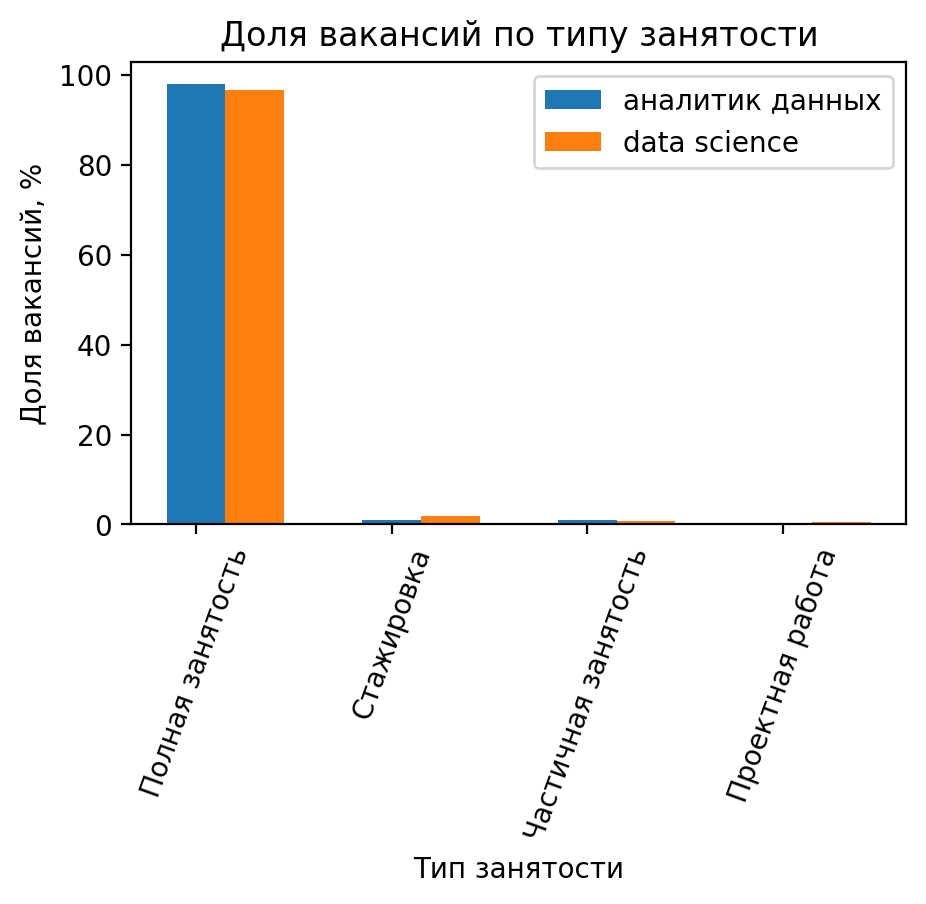

In [73]:
# переменной, включённой в функцию comparison для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'employment'
parameter_sort = 'name'
ascending_name = False
# уточним характеристики гистограммы:
parameter_hist_name = 'Тип занятости'
title_name = 'типу занятости'

# вызовем функцию comparison
comparison(parameter_name, parameter_sort, ascending_name)

Наибольшее количество вакансий размещается под полную занятость. Их отношение в таблицах разной направленности соответствует пропорции общего количества вакансий. При частичной занятости вакансий для аналитиков больше на 30%, а для специалистов date science предоставлено на 8,5% больше стажировок. Количество предложений проектной работы одинаково для обеих специализаций.

In [74]:
category_name = 'employment'
limit = 0
pivot_category_da(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
employment,,,,,
All,141,1091,555,12,1799
Полная занятость,122,1079,549,12,1762
Стажировка,15,1,0,0,16
Частичная занятость,3,8,5,0,16
Проектная работа,1,3,1,0,5


Среди вакансий для аналитиков с разным опытом молодые специалисты чаще нужны при частичной и проектной занятости. Им так же больше предлагается стажировок, так как компании выгодно обучить неопытного сотрудника, оплачивая или вовсе не плачивая стажировку, чтобы понять насколько хорошо он может справляться с реальными задачами и оценить дальнейший уровень ответственности и оплаты труда. Сотрудники с большим опытом работы требуются только на полную занятость. Это логично для ответственных должностей руководителей, глубже погружённых в проекты и данные компании.

In [75]:
category_name = 'employment'
limit = 0
pivot_category_ds(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
employment,,,,,
All,44,433,465,32,974
Полная занятость,26,422,462,32,942
Стажировка,17,2,0,0,19
Частичная занятость,0,7,1,0,8
Проектная работа,1,2,2,0,5


Для сосикателей специальности date science распределение количества вакансий по типу занятости среди специалистов разного уровня опыта аналогично специализации аналитика.

Рассмотрим медианные значения предлагаемой оплаты труда при разном типе занятости для разных категорий опыта соискателя.

In [76]:
pd.pivot_table(data_da, 
                index = 'employment',
                columns = 'experience',
                values = ['salary_from', 'salary_to'],
                aggfunc = 'median',
                fill_value=0
            )

salary_from                             salary_to  \
experience               Junior Junior_plus  Middle  Senior    Junior   
employment                                                              
Полная занятость          60000       88280  160000  200000     80000   
Проектная работа         112200           0       0       0         0   
Стажировка                43000           0       0       0     25500   
Частичная занятость       90000      100000  120000       0         0   

                                                 
experience          Junior_plus  Middle  Senior  
employment                                       
Полная занятость         120000  250000  240000  
Проектная работа              0       0       0  
Стажировка                    0       0       0  
Частичная занятость      100000  145000       0

In [77]:
pd.pivot_table(data_ds, 
                index = 'employment',
                columns = 'experience',
                values = ['salary_from', 'salary_to'],
                aggfunc = 'median',
                fill_value=0
            )

salary_from                             salary_to  \
experience               Junior Junior_plus  Middle  Senior    Junior   
employment                                                              
Полная занятость          60000      120000  200000  160000     80000   
Проектная работа         140250           0       0       0         0   
Стажировка                    0           0       0       0     25000   
Частичная занятость           0      100000       0       0         0   

                                                 
experience          Junior_plus  Middle  Senior  
employment                                       
Полная занятость         250000  300000  300000  
Проектная работа          30000       0       0  
Стажировка                    0       0       0  
Частичная занятость           0       0       0

Для начинающих специалистов обеих специальностей есть нижние пороги стоимости проектной работы, что может представлять из себя подобие стажировки. Для аналитиков данных медианное значение этой величины оказался ниже на 20%. Указанные суммы оплаты стажировок есть только для молодых специалистов, они примерно равны и составляют до 25500 руб в среднем. Оплата частичной занятости указана перимущественно для специалистов анализа данных и прямо пропорциональна росту уровня опыта соискателя.

**Вывод**

- Наибольшее количество вакансий размещается под полную занятость. Их отношение в таблицах разной направленности соответствует пропорции общего количества вакансий. При частичной занятости вакансий для аналитиков больше на 30%, а для специалистов date science предоставлено на 8,5% больше стажировок. Количество предложений проектной работы одинаково для обеих специализаций.
- Для обеих специальностей молодые специалисты чаще нужны при частичной и проектной занятости. Им так же больше предлагается стажировок, так как компании выгодно обучить неопытного сотрудника, оплачивая или вовсе не плачивая стажировку, чтобы понять насколько хорошо он может справляться с реальными задачами и оценить дальнейший уровень ответственности и оплаты труда. Сотрудники с большим опытом работы требуются только на полную занятость. Это логично для ответственных должностей руководителей, глубже погружённых в проекты и данные компании.
- Для начинающих специалистов обеих специальностей есть нижние пороги стоимости проектной работы, что может представлять из себя подобие стажировки. Для аналитиков данных медианное значение этой величины оказался ниже на 20%. Указанные суммы оплаты стажировок есть только для молодых специалистов, они примерно равны и составляют до 25500 руб в среднем. Оплата частичной занятости указана перимущественно для специалистов анализа данных и прямо пропорциональна росту уровня опыта соискателя.

### Анализ влияния предлагаемого графика работы.

,schedule,count_da,ratio_da%,count_ds,ratio_ds%,dif_ratio
0,Полный день,1440,80.04,723,74.23,5.81
1,Удаленная работа,309,17.18,203,20.84,3.66
2,Гибкий график,41,2.28,43,4.41,2.13
3,Сменный график,9,0.50,5,0.51,0.01


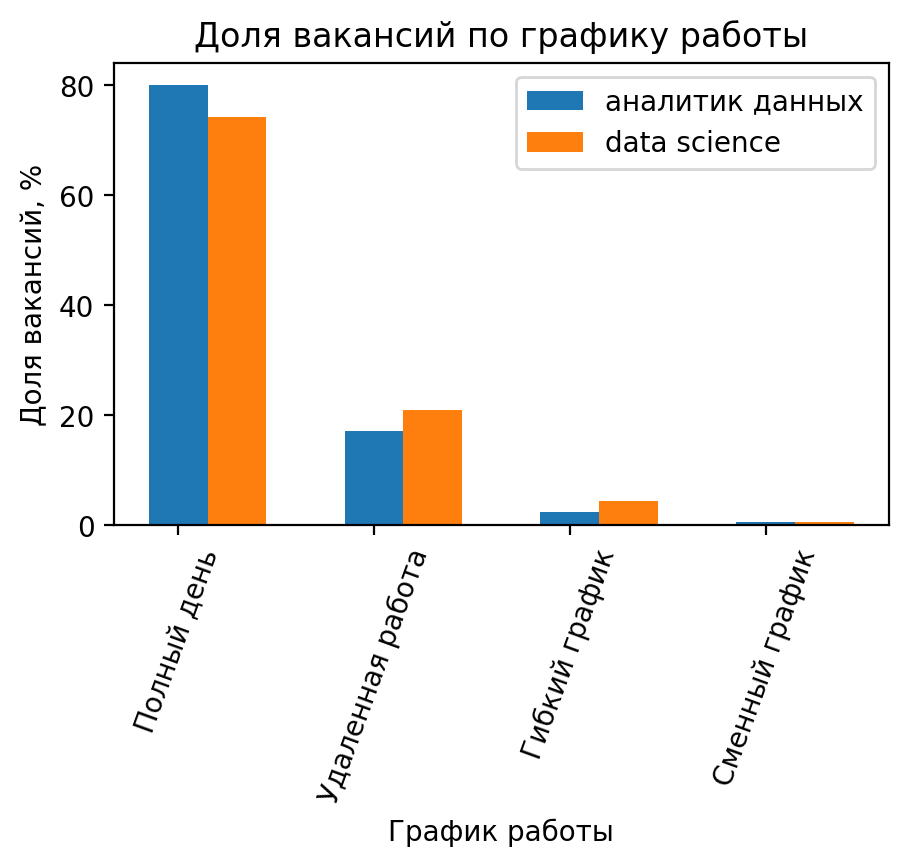

In [78]:
# переменной, включённой в функцию comparison для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'schedule'
parameter_sort = 'name'
ascending_name = False
# уточним характеристики гистограммы:
parameter_hist_name = 'График работы'
title_name = 'графику работы'

# вызовем функцию comparison
comparison(parameter_name, parameter_sort, ascending_name)

Занятость на полный рабочий день наиболее востребована среди обеих специальностей. 

Вакансий с удалённым форматом работы на 21% больше для аналитиков данных, а с гибким графиком - на 2% чаще для специалистов date science. 

При этом среди всех вакансий по специальностям аналитиков данных на 3% чаще ждут в офисе, чем специалистов date science. 
Доля предложений сменного графика в рамках обеих специализаций почти одинакова и составляет 0,50-0,51%.

In [79]:
category_name = 'schedule'
limit = 0
pivot_category_da(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
schedule,,,,,
All,141,1091,555,12,1799
Полный день,121,905,406,8,1440
Удаленная работа,15,158,132,4,309
Гибкий график,3,21,17,0,41
Сменный график,2,7,0,0,9


Среди аналитиков доля вакансий удалённой работы и гибкого графика максимальна для Middle специалистов. 

Если рассмотривать каждый формат графика работы отдельно, то количество вакансий для разных уровней опыта соискателя прямо пропорционально общему количеству вакансий по уровню опыта соискателя.

In [80]:
category_name = 'schedule'
limit = 0
pivot_category_ds(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
schedule,,,,,
All,44,433,465,32,974
Полный день,28,316,355,24,723
Удаленная работа,9,99,90,5,203
Гибкий график,7,15,19,2,43
Сменный график,0,3,1,1,5


Для специалистов date science ситуация немного иная. Количество вакансий на полный рабочий день прямо пропорционально общему количеству вакансий по уровням опыта соискателя. Удалённую работу и сменный график чаще предлагают для Junior_plus, а гибкий график - для Middle.
Также стоит обратить внимание, что в отличие от аналитиков с большим опытом, date science уровня Senior доступны гибкий и сменный графики.

**Вывод**

- Занятость на полный рабочий день наиболее востребована среди обеих специальностей. 
- Вакансий с удалённым форматом работы на 21% больше для аналитиков данных, а с гибким графиком - на 2% чаще для специалистов date science. При этом среди всех вакансий по специальностям аналитиков данных на 3% чаще ждут в офисе, чем специалистов date science. Доля предложений сменного графика в рамках обеих специализаций почти одинакова и составляет 0,50-0,51%.

- Среди аналитиков доля вакансий удалённой работы и гибкого графика максимальна для Middle специалистов.

- В рамках каждого формата графика работы количество вакансий для разных уровней опыта соискателя прямо пропорционально общему количеству вакансий по уровню опыта соискателя.

- Для специалистов date science Количество вакансий на полный рабочий день прямо пропорционально общему количеству вакансий по уровням опыта соискателя. Удалённую работу и сменный график чаще предлагают для Junior_plus, а гибкий график - для Middle. 
- В отличие от аналитиков с большим опытом, date science уровня Senior доступны гибкий и сменный графики.

## Исследование требуемых навыков.

Многие компании при размещении вакансий упоминают навыки и знания, которыми должен обладать соискатель по их мнению. Это могут быть не только прикладные навыки, именуемые hard skills, позволяющие механически выполнять работу (знания и опыт пользования конктретными продуктами, применяемыми в компании), но и личностные качества (коммуникабельность, эмпатия, умение работать в команде и тд). Рассмотрим наиболее часто упомянутые в имеющейся базе вакансий качества соискателя.

In [81]:
# Подсчитаем количество упоминаний навыков в списке из таблицы вакансий аналитиков:
top_skills_da = pd.Series(skills_name).value_counts().reset_index()
# переименуем столбцы для удобства:
top_skills_da.columns = ['key_skill', 'count_da']
# создадим столбец с долей упоминаний среди всей базы таблицы:
top_skills_da['rate_da'] = top_skills_da['count_da']/len(data_da['id'])*100
top_skills_da['rate_da'] = top_skills_da['rate_da'].apply(lambda x: f'{x:.2f}').astype(float)
# оценим результат, взяв наиболее частые 20 упоминаний:
top_skills_da.head(20)

,key_skill,count_da,rate_da
0,sql,767,42.63
1,не указано,708,39.36
2,python,581,32.30
3,анализ данных,518,28.79
4,базы данных,318,17.68
5,ms power bi,287,15.95
6,ms excel,282,15.68
7,аналитические навыки,278,15.45
8,статистический анализ,188,10.45
9,работа с большим объемом информации,183,10.17


Наиболее часто в вакансиях для аналитика данных упоминается умение пользоваться в работе SQL (42,63%), python (32.30%) и расширенным пакетом MS: в 15.68% объявлениях Excel, как базовым инструментом работы с таблицами, в 15.95% Power BI для визуализации и в 3.56% Power Point для презентации. Однако в качестве BI систем в топ-20 навыков входит Tableau (5.23%) или работа с BI без упоминания конкретной системы (3.50%).

Рассмотрим упомянутые навыки в таблице специалистов data sciense по тому же принципу.

In [82]:
# Подсчитаем количество упоминаний навыков в списке из таблицы вакансий data science:
top_skills_ds = pd.Series(skills_name_ds).value_counts().reset_index()
# переименуем столбцы для удобства:
top_skills_ds.columns = ['key_skill', 'count_ds']
# создадим столбец с долей упоминаний среди всей базы таблицы:
top_skills_ds['rate_ds'] = top_skills_ds['count_ds']/len(data_ds['id'])*100
top_skills_ds['rate_ds'] = top_skills_ds['rate_ds'].apply(lambda x: f'{x:.2f}').astype(float)
# оценим результат, взяв наиболее частые 20 упоминаний:
top_skills_ds.head(20)

,key_skill,count_ds,rate_ds
0,не указано,453,46.51
1,python,444,45.59
2,sql,262,26.90
3,моделирование,205,21.05
4,машинное обучение,200,20.53
5,статистический анализ,128,13.14
6,анализ данных,120,12.32
7,data science,103,10.57
8,pandas,95,9.75
9,nlp,76,7.80


Как и в случае аналитиков, наиболее часто упоминаются python (45,59%) и SQL(26,90%), однако далее ожидаемо происходит разделение специализаций: вместо анализа и представления результатов на более важный план выходят моделирование, машинное обучение и статистический анализ. Далее упоминаются более точно инструменты data sciense (nlp-7,8%, pytorch-7,7%, git-5,03%, docker-4%).

В топ-20 навыков для специалистов date science вошли преимущественно навыки работы с инструментами специалистов, так называемые Hard Skills. В то время, как для аналитиков чаще встечается обобщённое понятие аналитических навыков или их направлений (анализ бизнес-показателей, сбор и анализ информации, анализ данных, аналитические навыки и подобные).

Соединим полученные таблицы и сравним доли наиболее часто упоминающихся (более 10%) навыков для каждой специальности.

In [83]:
# соединим таблицы по названию навыка так, чтобы в неё вошли все строки:
df_skills = pd.merge(top_skills_da, top_skills_ds, on='key_skill', how='outer')
# выберем из полученной таблицы лишь те навыки, которые  имеют более 10% упоминаний и заполним пропуски 0:
df_skills = (df_skills
             .loc[(df_skills['rate_da']>10)|(df_skills['rate_ds']>10)]             
             .sort_values(by='count_da')
             .reset_index(drop= True)
             .fillna(0)
            )
# подсчитаем разницу доли упоминаний для специальностей:
df_skills['diff_rate'] = abs(df_skills['rate_da'] - df_skills['rate_ds'])
# оценим результат:
df_skills

,key_skill,count_da,rate_da,count_ds,rate_ds,diff_rate
0,машинное обучение,10.0,0.56,200.0,20.53,19.97
1,data science,18.0,1.00,103.0,10.57,9.57
2,моделирование,27.0,1.50,205.0,21.05,19.55
3,работа с большим объемом информации,183.0,10.17,8.0,0.82,9.35
4,статистический анализ,188.0,10.45,128.0,13.14,2.69
5,аналитические навыки,278.0,15.45,42.0,4.31,11.14
6,ms excel,282.0,15.68,6.0,0.62,15.06
7,ms power bi,287.0,15.95,9.0,0.92,15.03
8,базы данных,318.0,17.68,34.0,3.49,14.19
9,анализ данных,518.0,28.79,120.0,12.32,16.47


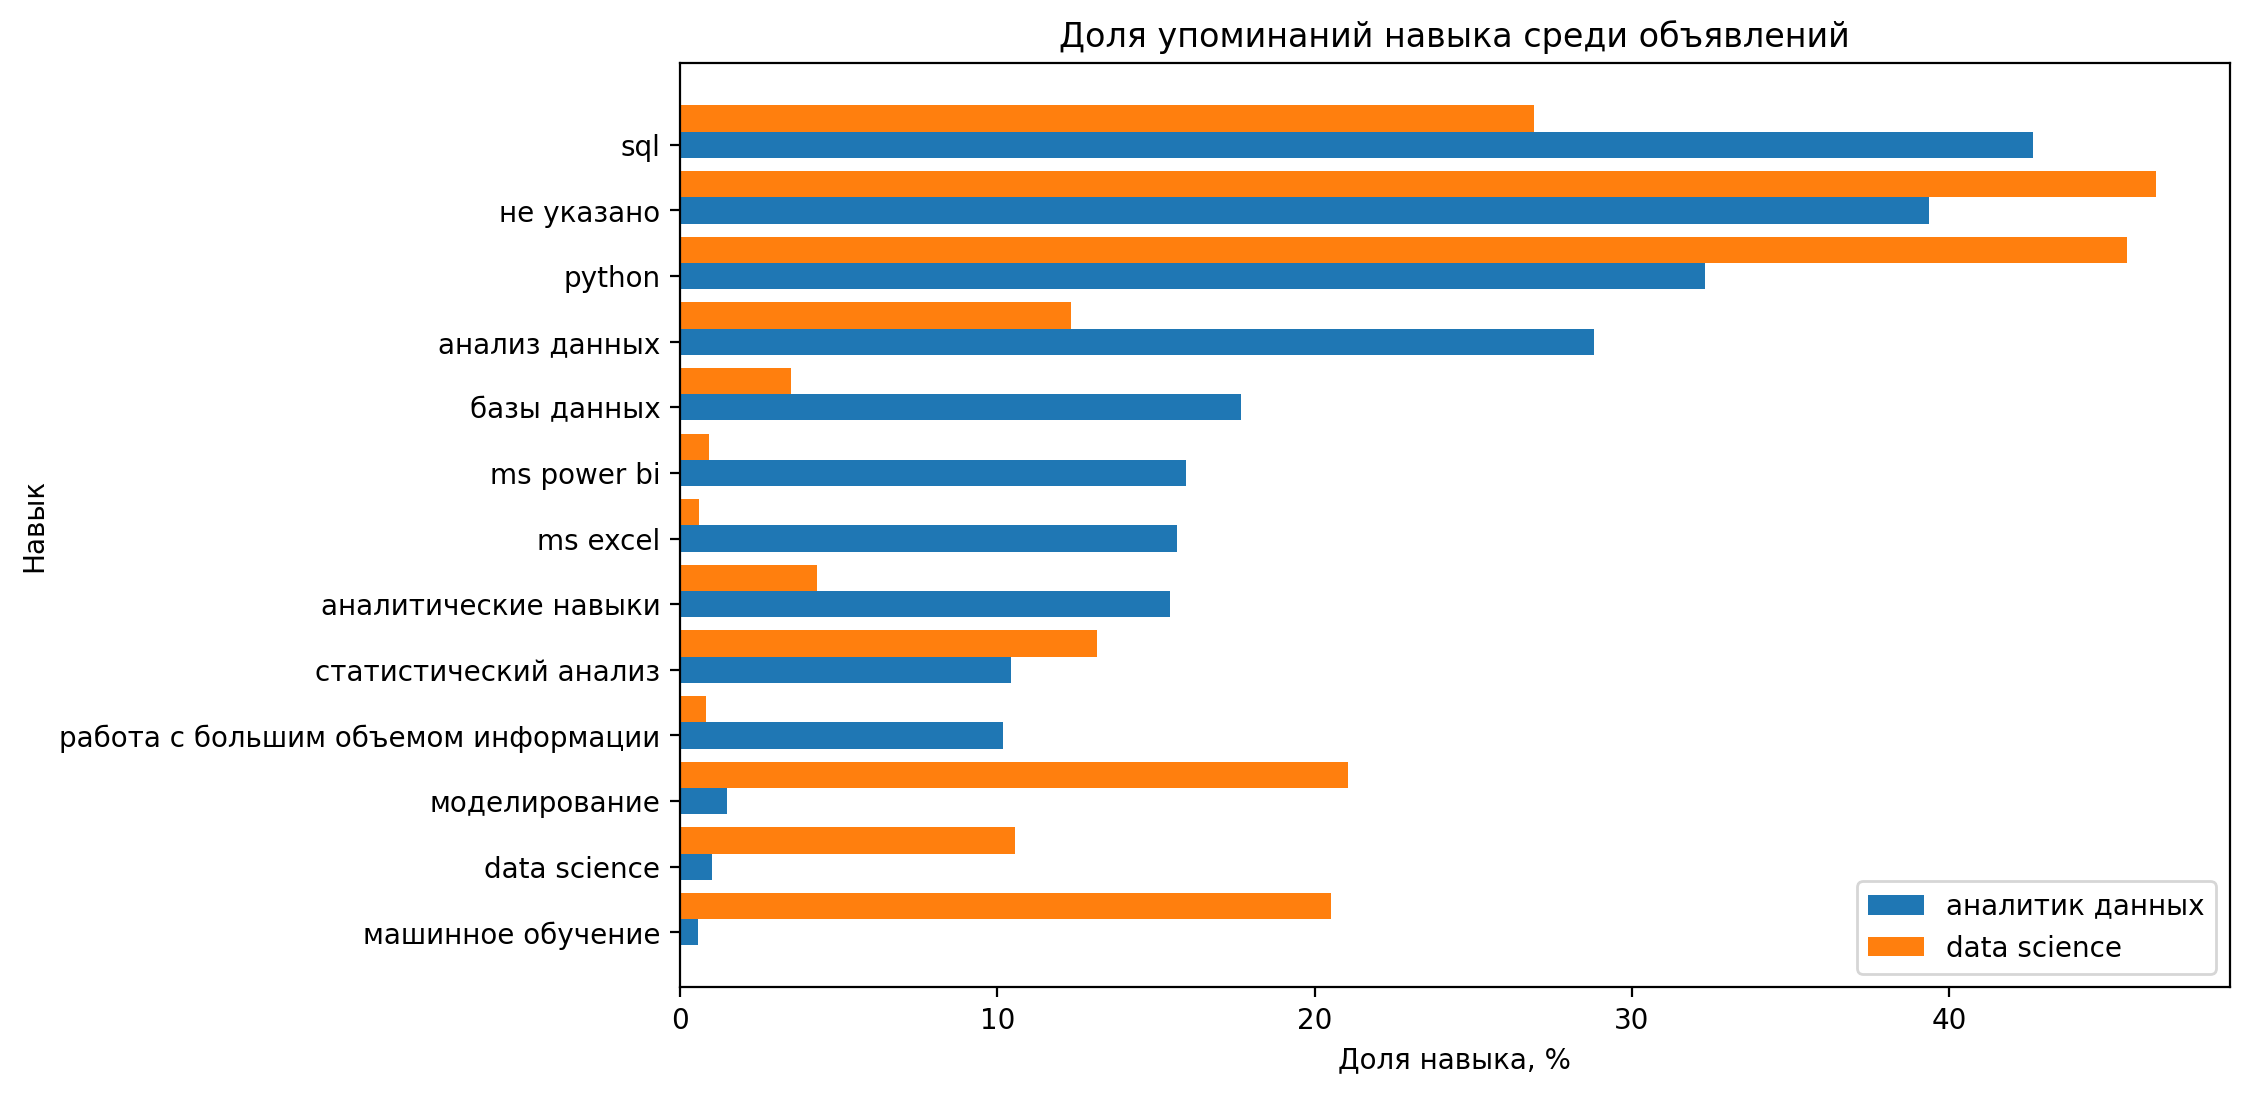

In [84]:
# визуализируем данные долей упоминаний навыков для быстрой оценки:
plt.figure(figsize=(10, 6))
index = np.arange(len(df_skills['key_skill']))
bw = 0.4
plt.barh(index, df_skills['rate_da'], bw)  
plt.barh(index+bw, df_skills['rate_ds'], bw)
plt.title('Доля упоминаний навыка среди объявлений')
plt.ylabel('Навык')
plt.xlabel('Доля навыка, %')
plt.yticks(index, df_skills['key_skill'])
plt.legend(['аналитик данных', 'data science'])
plt.show()

Из полученных данных можно заметить, что наиболее часто упоминаются именно технические навыки (hard skills). Рассмотрим отдельно, какие мягкие (личностные) навыки обозначают работодатели.

In [85]:
data_da['soft_skills_from_description'] = data_da['soft_skills_from_description'].fillna('Не указано')
soft_skills_name_da = data_da['soft_skills_from_description'].str.split(',').explode().str.strip().str.lower()
print(len(soft_skills_name_da))
print(sorted(soft_skills_name_da.unique()))

data_ds['soft_skills_from_description'] = data_ds['soft_skills_from_description'].fillna('Не указано')
soft_skills_name_ds = data_ds['soft_skills_from_description'].str.split(',').explode().str.strip().str.lower()
print(len(soft_skills_name_ds))
print(sorted(soft_skills_name_ds.unique()))

1936
['адаптивность', 'аналитическое мышление', 'внимание к деталям', 'документация', 'коммуникация', 'креативность', 'критическое мышление', 'не указано', 'переговоры', 'презентация результатов', 'принятие решений', 'проактивность', 'решение проблем', 'тайм-менеджмент', 'эмпатия']
1042
['адаптивность', 'аналитическое мышление', 'внимание к деталям', 'документация', 'коммуникация', 'креативность', 'лидерство', 'не указано', 'переговоры', 'письменная коммуникация', 'презентация результатов', 'принятие решений', 'проактивность', 'работа в команде', 'решение проблем']


Ошибок и дублирования значения здесь нет, поэтому списки можно оценивать без дополнительной обработки.

In [86]:
# Подсчитаем количество упоминаний навыков в списке из таблицы вакансий аналитиков:
soft_skills_name_da = pd.Series(soft_skills_name_da).value_counts().reset_index()
soft_skills_name_ds = pd.Series(soft_skills_name_ds).value_counts().reset_index()

# переименуем столбцы для удобства:
soft_skills_name_da.columns = ['key_skill', 'count_da']
soft_skills_name_ds.columns = ['key_skill', 'count_ds']

# создадим столбец с долей упоминаний среди всей базы таблицы:
soft_skills_name_da['rate_da'] = soft_skills_name_da['count_da']/len(data_da['id'])*100
soft_skills_name_da['rate_da'] = soft_skills_name_da['rate_da'].apply(lambda x: f'{x:.2f}').astype(float)
soft_skills_name_ds['rate_ds'] = soft_skills_name_ds['count_ds']/len(data_da['id'])*100
soft_skills_name_ds['rate_ds'] = soft_skills_name_ds['rate_ds'].apply(lambda x: f'{x:.2f}').astype(float)

# соединим таблицы по названию навыка так, чтобы в неё вошли все строки:
soft_skills = pd.merge(soft_skills_name_da, soft_skills_name_ds, on='key_skill', how='outer')
# подсчитаем разницу доли упоминаний для специальностей:
soft_skills['diff_rate'] = abs(df_skills['rate_da'] - df_skills['rate_ds'])
# выберем из полученной таблицы лишь те навыки, которые  имеют более 5% упоминаний и заполним пропуски 0:
soft_skills = (soft_skills
            .loc[(soft_skills['rate_da']>5)|(soft_skills['rate_ds']>5)]             
             .sort_values(by='count_da')
             .reset_index(drop= True)
             .fillna(0)
            )
# оценим результат:
soft_skills


,key_skill,count_da,rate_da,count_ds,rate_ds,diff_rate
0,аналитическое мышление,152.0,8.45,24.0,1.33,9.35
1,коммуникация,181.0,10.06,111.0,6.17,19.55
2,документация,279.0,15.51,165.0,9.17,9.57
3,не указано,1212.0,67.37,680.0,37.80,19.97


Наиболее актуальными для обеих специальностей стали умения работать с документацией, коммуникация и аналитическое мышление.

**Вывод**

- Среди объявлений для аналитиков поле желаемых навыков заполняется чаще на 7,15%. 
- SQL и Python - два основных навыка, всречающихся чаще всего в объявлениях обеих специальностей. Однако для аналитиков SQL на 15,73% важнее, а для data sciense на 13,29% важнее работа на Python.
- Анализ данные и аналитические навыки в целом ожидаемо чаще встречаются у аналитиков, так как это их основное направление деятельности. 
- Статистический анализ оказался почти одинаково нужен обеим специальностям (10,45% и 13,14%).
- Знания рабочих программ MS важнее для аналитика: MS Excel	на 15.06%, MS Power BI на 15.03%. Это объясняется необходимостью аналитиков коммуницировать с другими отделами, получая и предоставляя информацию в удобном для них и наиболее распространённом формате. 
- Навыки Data Science, моделирования и машинного обучения ожидаемо спрашиваются в вакансиях data science, и среди аналитиков не популярны (на 19,55%, 9,57% и 19,97% соответственно).
- Из личностных навыков наиболее часто встречающимся является хорошая коммуникация. 

## Выявление наиболее часто встречающихся городов вакансий.

Формат удаленной работы, который поддерживают многие IT-компании, позволяет работодателям нанимать специалистов с высокой квалификацией вне зависимости от их местоположения, однако даже при этом условии чаще всего рассматриваются местные специалисты. К тому же большинство вакансий, представленных в обеих базах, имеют оффисный или гибридный формат, не позволяющий принять на работу удалённого сотрудника.

Рассмотрим, в каких городах чаще всего размещались вакансии для обеих специальностей.

In [87]:
# Сгруппируем таблицу по геолокации и подсчитаем количество вакансий в каждой из них:
top_area_da = data_da.groupby('area').agg({'id':'count'}).sort_values(by='id', ascending=False).head(15)
# создадим столбец с долей вакансий среди общего количества в базе:
top_area_da['rate'] = top_area_da['id']/len(data_da['id'])*100
top_area_da['rate'] = top_area_da['rate'].apply(lambda x: f'{x:.2f}').astype(float)
# оценим результат:
top_area_da.reset_index()

,area,id,rate
0,Москва,1245,69.21
1,Санкт-Петербург,181,10.06
2,Екатеринбург,51,2.83
3,Новосибирск,33,1.83
4,Нижний Новгород,33,1.83
5,Владивосток,31,1.72
6,Казань,29,1.61
7,Краснодар,22,1.22
8,Самара,11,0.61
9,Челябинск,10,0.56


Городов, представленных в таблице значительно меньше, чем регионов в России, что говорит о неравноомерном проникновении IT-технологий и оставляет перспективы для востребованности специалистов этой сферы. Рассмотрим количества вакансий в топ-20 городах для разных уровней опыта.

In [88]:
# переменной, включённой в функцию comparison для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'area'
parameter_sort = 'name'
ascending_name = False

category_name = 'area'
limit = 5
pivot_category_da(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
area,,,,,
All,129,1023,545,12,1709
Москва,70,732,431,12,1245
Санкт-Петербург,19,106,56,0,181
Екатеринбург,5,33,13,0,51
Новосибирск,5,21,7,0,33
Нижний Новгород,6,20,7,0,33
Владивосток,11,18,2,0,31
Казань,1,17,11,0,29
Краснодар,2,17,3,0,22


Наиболее опытные сотрудники уровня Senior запрашиваются только в Москве, которая возглавляет топ-лист городов IT-вакансий, обгоняя расположенный на втором месте Санкт-Петербург в 6,8 раза.
Резкое падение количества вакансий для регионов одинаково для всех уровней опыта сотрудника и прямопропорционально падению общего количества.
Среди общей картины малого спроса можно выделить 11 вакансий для Midlle специалистов в Казани и 11 вакансий для специалистов без опыта во Владивостоке. Оба города-миллионника активно развивают IT-сферу и являются привлекательными для бизнеса.

In [89]:
# Сгруппируем таблицу по геолокации и подсчитаем количество вакансий в каждой из них:
top_area_ds = data_ds.groupby('area').agg({'id':'count'}).sort_values(by='id', ascending=False).head(15)
# создадим столбец с долей вакансий среди общего количества в базе:
top_area_ds['rate'] = top_area_ds['id']/len(data_ds['id'])*100
top_area_ds['rate'] = top_area_ds['rate'].apply(lambda x: f'{x:.2f}').astype(float)
# оценим результат:
top_area_ds.reset_index()

,area,id,rate
0,Москва,762,78.23
1,Санкт-Петербург,91,9.34
2,Новосибирск,25,2.57
3,Екатеринбург,19,1.95
4,Нижний Новгород,17,1.75
5,Казань,15,1.54
6,Самара,5,0.51
7,Томск,5,0.51
8,Краснодар,5,0.51
9,Сочи,4,0.41


Для специальности data science лидеры не изменились, но поменялись местами третья и четвёртая позиции списка. Так же в топ-20 городов по количеству вакансий не вошли Владивосток, Ростов-на-Дону и Пермь. Они уступили места Сочи, Ижевску и Тамбову.

In [90]:
# переменной, включённой в функцию comparison для уточнения источника данных передадим
# соответствующее выбранному столбцу имя:
parameter_name = 'area'
parameter_sort = 'name'
ascending_name = False

category_name = 'area'
limit = 5
pivot_category_ds(category_name, limit)

experience,Junior,Junior_plus,Middle,Senior,All
area,,,,,
All,42,406,450,31,929
Москва,29,317,386,30,762
Санкт-Петербург,6,42,43,0,91
Новосибирск,4,15,5,1,25
Екатеринбург,1,14,4,0,19
Нижний Новгород,0,13,4,0,17
Казань,2,5,8,0,15


Активность работодателей Новосибирска выше, чем Екатеринбурга для этой специальности. Там предлагают больше вакансий для всех уровней опыта соискателя. Также можно отметить Казань, где востребованы Midlle-специалисты.

Рассмотрим колебания уровня заработной платы по городам. Для подсчёта медианных занчений возьмём столбец с минимальным порогом заработной платы, так как он наиболее заполнен в обеих таблицах.

In [91]:
# сформируем две сводные таблицы по кадой специальности:
table_da = data_da.pivot_table(values='salary_from', 
                       index='area', 
                       columns='experience', 
                       aggfunc='median')
table_ds = data_ds.pivot_table(values='salary_from', 
                       index='area', 
                       columns='experience', 
                       aggfunc='median')
# соединим даблицы для сравнения:
table = pd.merge(table_da, table_ds, on='area', how='outer', suffixes=["_da", "_ds"])
# пеместим столбцы для удобства сравнения:
table = table[['Junior_da', 'Junior_ds', 
               'Junior_plus_da', 'Junior_plus_ds', 
               'Middle_da', 'Middle_ds', 
               'Senior_da', 'Senior_ds']]
# отсортируем таблицу по наиболее заполненным столбцам:
table.sort_values(['Junior_plus_da', 'Junior_plus_ds', 'area'], ascending=[False, False, True]).fillna('-')

experience,Junior_da,Junior_ds,Junior_plus_da,Junior_plus_ds,Middle_da,Middle_ds,Senior_da,Senior_ds
area,,,,,,,,
Омск,-,-,120000.0,-,-,-,-,-
Санкт-Петербург,75000.0,100125.0,108000.0,175000.0,180000.0,185000.0,-,-
Москва,70000.0,92376.0,100000.0,150000.0,150000.0,250000.0,200000.0,160000.0
Мытищи,-,-,100000.0,-,-,-,-,-
Пушкино (Московская область),-,-,100000.0,-,-,-,-,-
Владивосток,60000.0,-,88280.0,-,150000.0,150000.0,-,-
Чебоксары,-,-,85000.0,-,-,-,-,-
Екатеринбург,45000.0,60000.0,80000.0,70000.0,142500.0,200000.0,-,-
Красноярск,50000.0,-,80000.0,-,-,-,-,-


**Вывод**

- Городов, представленных в таблице значительно меньше, чем регионов в России, что говорит о неравномерном распространении IT-технологий и оставляет перспективы востребованности специалистов этой сферы.
- Топ-список городов возглавляет Москва (69% для аналитиков и 78% для data science).
- Наиболее опытные сотрудники уровня Senior запрашиваются только в Москве, которая возглавляет топ-лист городов IT-вакансий, обгоняя расположенный на втором месте Санкт-Петербург в 6,8 раза. Резкое падение количества вакансий для регионов одинаково для всех уровней опыта сотрудника и прямопропорционально падению общего количества. Среди общей картины малого спроса можно выделить 11 вакансий для Midlle специалистов в Казани и 11 вакансий для специалистов без опыта во Владивостоке. Оба города-миллионника активно развивают IT-сферу и являются привлекательными для бизнеса.
- Для специальности data science лидеры не изменились, но поменялись местами третья и четвёртая позиции списка. Так же в топ-20 городов по количеству вакансий не вошли Владивосток, Ростов-на-Дону и Пермь. Они уступили места Сочи, Ижевску и Тамбову. Активность работодателей Новосибирска выше, чем Екатеринбурга для этой специальности. Там предлагают больше вакансий для всех уровней опыта соискателя. Также можно отметить Казань, где востребованы Midlle-специалисты.
- В средних показателях минимального порога заработной платы Москва уступила лидерство Омску и Санкт-Петербургу. Это связано преимущественно с тем, что величина выборки столицы значительно превышает значения других городов и может более точно отразить медианные значения. Малое количество вакансий и малое количество обозначенных минимальных порогов ЗП в регионах искажает значения средних и медианных показателей. 
- Уровень минимального порога в городах для разных специальносей в целом повотряет установленную ранее тенденцию: для специалистов data science он либо равен, либо выше, чем для специалистоов аналитики данных. Лишь в Казани уровень ЗП для аналитика без опыта завышен. Так же необычно ведет себя этот показатель в Новосибирске, где уровень стартовой ЗП для Midlle и Junior+ примерно равны. Это может огбъясняться ошибкой работодателя при заполнении требуемого уровня опыта.

# Общий вывод

Для компании HH.ru был проведен анализ вакансий в России, размещённых на её портале работодателями. 

Целю анализа ставилось выявление описания наиболее типичной вакансии с точки зрения требований к соискателю и условий труда для двух направлений IT-сферы - аналитик данных и data science. Для этого были взяты в работу данные каждой вакансии с учётом описания работы и выставляемых требований.



Данные, полученные от заказчика представляли собой собранные в два excel-файла характеристики каждой вакансии. Обе полученные базы данных были первично проверены и предобработаны при выгрузке для дальнейшего анализа. Для достижения целей было решено анализировать таблицы прознь с объединением промежуточных результатов для наглядности при необходимости. 

- Предварительный анализ установил, что таблицы с данными имеют 20 столбцов и 1801 строку для аналитиков и 974 строки для  data science. Названия столбцов корректны и не требуют исправлений. В таблицах присутствуют преимущественно строчные данные, которые необходимо проверить на наличие ошибок написания, так же есть числовые столбцы и один столбец с датой и временем размещения вакансии, который необходимо сократить до даты. Некоторые столбцы заполнялись автоматически и не требовали предобработки.
- Пропуски присутствовали в столбце названия департамента, который не очень важен для анализа, столбцах с заработной платой и столбцах перечисления навыков и способностей, которые необходимо рассмотреть детально в ходе анализа.

### В ходе предобработки выгруженных данных было сделано:

- Столбец "employer" и следующий за ним "department", хранящие названия компаний-работодателей и их струкрурных подразделений соответственно, имели ошибки написания названий. Компании, входящие входят в крупные группы были обьединены в одного работодателя с уточнением конкретного подразделения или входящей в конгломерат компании в столбце 'department'. В результате этих манипуляций мы смогли упорядочить и сгруппировать 5,5% вакансий для таблицы специалистов аналитики данных и 5,26% вакансий для специалистов data science.
- Столбец experience (условие требуемого опыта соискателя) в обеих таблицах имеет одинаковую градацию и заполняется путём выбора предлогаемого варианта из четырёх: 'Junior (no experince)', 'Junior+ (1-3 years)', 'Middle (3-6 years)', 'Senior (6+ years)'. Для облегчения дальнейшей работы значения столбца были переписаны с учетом змеиного языка для дальнейшей категоризации при анализе.
- Столбцы с упоминанием навыков частично заполнялись вручную, частично автоматически из текста вакансии. Для дальнейшего анализа было решено выбрать более полный список для каждой вакансии, который автоматически формировался из опсания. Список навыков для каждой вакансии был занесён в общий отдельный для специалистов список, в написании и названиях навыков и инструментов были исправлены ошибки, проведена замена дублирующих вариантов написания. Таким образом было упорядочено более 91% названий навыков в обеих таблицах.
- Числовые параметры вакансий представлены в виде критериев заработной платы, расположенных в трёх разных столбцах. Для заполнения пропусков в категориях ЗП были проверены ручные вводные данные столбцов верхней и нижней границы ЗП. Для данных аналитиков группировка категорий по верхней границе не выявила не заполненных диапазонов, по нижней выявлено 194 вакансии без указанной категории. Доля внесённых изменений категорий составляет: 12.33 %. В таблице data science Ситуация аналогична и в 39 случаях необходимо было заменено значение категории, что составило - 4,37%.
- Полных дубликатов не обнаружено благодаря тому, что данные были первично проверены на этапе выгрузки. Доля скрытых дубликатов, повторяющихся по нескольким основным столбцам составляет 12,2% для данных с вакансиями аналитиков и 13,5% для date science, что слишком много для удаления. Работодатель может размещать несколько одинаковых вакансий при наличии нескольких ставок в дивизионе или дублировать их при обновлении вакансии и изменении параметров оплаты труда. Эти данные решено не удалять. Найденные дубликаты можно использовать для заполнения пропущенных характеристик заработной платы.
- При рассмотрении даты размещения как возможной подсказки для поиска дубликатов было удалено время размещения и обнаружено 0,11% дубликатов. Было решено считать эти вакансии технической ошибкой, которая могла возникнуть при заполнении формы размещения на портале. Эти дубликаты были удалены их из данных. Потеря такого количества данных не скажется на выявлении закономерностей.

### Выводы исследовательского анализа данных

- Исследуемый период заключается с 29 февраля по 11 июня 2024 года.
Количество размещаемых вакансий растёт на протяжении всего исследуемого периода. Низкие показатели февраля объяснимы малым количеством исследуемых дней - в данные попали лишь 2 для аналитиков и 1 для data science. То же касается и июня, так как окончание исследуемого периода наступило раньше окончания месяца. Однако уже в течение 11 дней количество объявлений для специалистов data science почти достигло значенпий предыдущего месяца.
Во все месяцы кроме мая сохраняется тенденция большего количества вакансий для специалистов data science. Однако в мае доля вакансий для аналитиков данных почто в 1,5 раза превысила вторую специальность.
При рассмотрении по неделям заметно, что в целом динамика колебаний количества вакансий для двух рассматриваемых специальностей схожа. Однако на 11 и 21 неделях можно заметить существенный скачок количества вакансий специалистов data sciense при падении количества вакансий аналитиков данных. Также на 16, 19 и 22 неделях виден рост количества вакансий аналитиков при падении количества вакансий date science. Это может быть связано с публикациями вакансий крупной компании для нескольких подразделений или локаций сразу.

- В обоих случаях специализации наблюдается максимальное количество запросов для молодых специалистов, имеющий небольшой опыт: 60,58% для аналитиков и 47,74% для data science.

Это объяснимо, так как работодателю удобнее нанять уже знакомого с работой сотрудника с хорошим набором навыков, но при этом не обременённого большим опытом в этой области и адаптировать его навыки под свои задачи. В то время как при полном отсутствии опыта есть риск, что времени на обучение и адаптацию уйдёт значительно больше. Поэтому специалисты без опыта работы нанимаются значительно реже для обеих специальностей (7,88% и 4,52% соответственно). Специалистам уровня middle так же предлагается много вакансий в обеих областях (30,88% и 44,46%), так как это наиболее активный работник, обладающий хорошим уровнем знаний и умений. Самые мало-популярные запросы от работодателей приходятся на senior. Скорее всего это связано с меньшим количеством руководящих должностей, которые чаще всего занимают специалисты этого уровня, и возможностью роста внутри компании, когда работодателю не приходится искать стороннего сторудника и должность занимает уже давно работающий в компании повышенный middle. Доли вакансий для наиболее опытных специалистов составляют 0,72% для аналитиков и 3,29% для data science.
При рассмотрении количества вакансий для разных областей направленности было замечено, что вакансий для специалистов data science уровня junior+ и middle примерно равно: 47,74% и 44,46%, в то время как для специалистов в области аналитики данных вакансий уровня middle почти на 30% меньше, чем junoir+.


При рассмотрении каждого отдельного уровня опыта специалиств можно отметить следующее:

-- вакансий для молодых специалистов больше в области аналитики данных почти на 13% для junior+ и на 3% для junior;

-- вакансии для midlle-специалистов встречаются в data science почти на 14% чаще, чем в области аналитики данных;

-- senior-специалисты чаще необходимы в data science.

- Конгламерат компаний СБЕР находится в лидерах для обоих направлений. Это вполне объяснимо не только количеством компаний, объединённых в единую систему, но и активным развитием IT-направлений в них. Кроме того, крупные партнёры портала могут пользоваться преимуществами в размещении большего числа вакансий.

Работодатели запрашивают либо большее количество аналитиков, либо в примерно равных количествах с data science. Исключением стали лишь Газпром и Samokat.tech, которые имеют вакансии для data science специалистов в два и шесть раз больше соответственно. Компании МегаФон, билайн и Ozon также имеют чуть больше вакансий для data science, но не значительно больше (11 против 8 для первых двух и 36 против 34 для Ozon).

В имеющейся базе данных среди 18 наиболее активных работодателей лишь 5 имеют больше вакансий для date science специалистов, нежели для аналитиков, что составляет 27,78%. Это так же объяснимо большей наполненностью базы данных аналитиков, чем date science базы.

Для специалистов-аналитиков распределение количества вакансий по опыту работы полностью подтверждает ранее замеченную тенденцию: работодатели чаще всего ищут специалистов с опытом Junior+ (1-3 years) и Middle (3-6 years). Из них наиболее многочисленными вакансиями стали Junior+ (1-3 years). Лишь для WILDBERRIES и группы компаний Яндекс запрос на более опытных специалистов превышает запрос на молодых специалистов. В случае Яндекс на момент исследования почти все вакансии соответствовали Middle (3-6 years). Это может быть объяснимо возможностью заполнения ставок обоих уровней Junior выпускниками курсов Практикума. В WILDBERRIES, где молодые специалисты нужны в 37% случаев, предпочтение отдаётся уровню Middle (60% вакансий).

В выборку топ-работодатей по количеству размещённых вакансий совсем не попали наиболее опытные специалисты. Это может быть объяснимо наличием в топ-компаниях сильных и уверенных руководителей, набирающих более молодых специалистов для расширения и обновления штата. Наличие у лидера списка количества вакансий для Senior, Леруа Мерлен, четырёх вакансий может говорить о необходимости заполнения штата в разных городах сети или о дублировании вакансии при повторном размещении.

Для специалистов data science ситуация немного иная: за исключением нескольких топовых групп компаний (СБЕР, ВТБ, Ростелеком, МегаФон и билайн) большинство запросов от работодателей на Middle(3-6 years), а не на молодых специалистов. Это может объясняться спецификой работы и необходимостью долгого обучения молодых специалистов.

Специалистов с высоким уровнем опыта в этом направлении спрашивают чаще, нежели среди аналитиков, однако ожидаемо для руководящих должностей, таких вакансий внутри одной компании очень мало, даже среди лидеров работодателей.



- Для специалистов date sciеnse ЗП не указана чаще, чем для аналитиков данных. ЗП до 200 тыс.руб чаще указана для аналитиков, а выше - для специалистов date science.

Для специалистов аналитики с малым опытом работы ЗП чаще указана при величине менее 200 тыс.

ЗП не указывается чаще при росте уровня соискателя, что может быть объяснимым желанием работодателя оценивать сосикателя по имеющеимся навыкам, а также желанием получить большое количество откликов для возможности широкого выбора потенциального работника.

Для специалистов date science наблюдается рост количества вакансий с указанным диапазоном ЗП при росте уровня ЗП. При этом общая закономерность роста числа вакансий с высокой ЗП с ростом уровня опытности сохраняется.

Категория специалистов без опыта работы в обоих направлениях стартуют с одинакового диапазона ЗП (60-80 тыс.руб). Однако далее наблюдается рост и средних, и медианных показателей обоих порогов у специалистов date science до уровня Senior. Это наибольший по опыту уровень рассматривать трудно, так как количество вакансий в целом и тем более с указанием пороговых или диапазонных значений крайне мало.


- Наибольшее количество вакансий размещается под полную занятость. Их отношение в таблицах разной направленности соответствует пропорции общего количества вакансий. При частичной занятости вакансий для аналитиков больше на 30%, а для специалистов date science предоставлено на 8,5% больше стажировок. Количество предложений проектной работы одинаково для обеих специализаций.

Для обеих специальностей молодые специалисты чаще нужны при частичной и проектной занятости. Им так же больше предлагается стажировок, так как компании выгодно обучить неопытного сотрудника, оплачивая или вовсе не плачивая стажировку, чтобы понять насколько хорошо он может справляться с реальными задачами и оценить дальнейший уровень ответственности и оплаты труда. Сотрудники с большим опытом работы требуются только на полную занятость. Это логично для ответственных должностей руководителей, глубже погружённых в проекты и данные компании.

Для начинающих специалистов обеих специальностей есть нижние пороги стоимости проектной работы, что может представлять из себя подобие стажировки. Для аналитиков данных медианное значение этой величины оказался ниже на 20%. Указанные суммы оплаты стажировок есть только для молодых специалистов, они примерно равны и составляют до 25500 руб в среднем. Оплата частичной занятости указана перимущественно для специалистов анализа данных и прямо пропорциональна росту уровня опыта соискателя.


- Занятость на полный рабочий день наиболее востребована среди обеих специальностей. Вакансий с удалённым форматом работы на 21% больше для аналитиков данных, а с гибким графиком - на 2% чаще для специалистов date science. При этом среди всех вакансий по специальностям аналитиков данных на 3% чаще ждут в офисе, чем специалистов date science. Доля предложений сменного графика в рамках обеих специализаций почти одинакова и составляет 0,50-0,51%.

Среди аналитиков доля вакансий удалённой работы и гибкого графика максимальна для Middle специалистов.

В рамках каждого формата графика работы количество вакансий для разных уровней опыта соискателя прямо пропорционально общему количеству вакансий по уровню опыта соискателя.

Для специалистов date science Количество вакансий на полный рабочий день прямо пропорционально общему количеству вакансий по уровням опыта соискателя. Удалённую работу и сменный график чаще предлагают для Junior_plus, а гибкий график - для Middle.

В отличие от аналитиков с большим опытом, date science уровня Senior доступны гибкий и сменный графики.


- Среди объявлений для аналитиков поле желаемых навыков заполняется чаще на 7,15%.

SQL и Python - два основных навыка, всречающихся чаще всего в объявлениях обеих специальностей. Однако для аналитиков SQL на 15,73% важнее, а для data sciense на 13,29% важнее работа на Python.

Анализ данных и аналитические навыки в целом ожидаемо чаще встречаются у аналитиков, так как это их основное направление деятельности.

Статистический анализ оказался почти одинаково нужен обеим специальностям (10,45% и 13,14%).
Знания рабочих программ MS важнее для аналитика: MS Excel на 15.06%, MS Power BI на 15.03%. Это объясняется необходимостью аналитиков коммуницировать с другими отделами, получая и предоставляя информацию в удобном для них и наиболее распространённом формате.

Навыки Data Science, моделирования и машинного обучения ожидаемо спрашиваются в вакансиях data science, и среди аналитиков не популярны (на 19,55%, 9,57% и 19,97% соответственно).

Из личностных навыков наиболее часто встречающимся является хорошая коммуникация.


- Городов, представленных в таблице значительно меньше, чем регионов в России, что говорит о неравномерном проникновении IT-технологий и оставляет перспективы для востребованности специалистов этой сферы. Рассмотрим количества вакансий в топ-20 городах для разных уровней опыта.

Топ-список городов возглавляет Москва (69% для аналитиков и 78% для data science).

Наиболее опытные сотрудники уровня Senior запрашиваются только в Москве, которая возглавляет топ-лист городов IT-вакансий, обгоняя расположенный на втором месте Санкт-Петербург в 6,8 раза. Резкое падение количества вакансий для регионов одинаково для всех уровней опыта сотрудника и прямопропорционально падению общего количества. Среди общей картины малого спроса можно выделить 11 вакансий для Midlle специалистов в Казани и 11 вакансий для специалистов без опыта во Владивостоке. Оба города-миллионника активно развивают IT-сферу и являются привлекательными для бизнеса.

Для специальности data science лидеры не изменились, но поменялись местами третья и четвёртая позиции списка. Так же в топ-20 городов по количеству вакансий не вошли Владивосток, Ростов-на-Дону и Пермь. Они уступили места Сочи, Ижевску и Тамбову. Активность работодателей Новосибирска выше, чем Екатеринбурга для этой специальности. Там предлагают больше вакансий для всех уровней опыта соискателя. Также можно отметить Казань, где востребованы Midlle-специалисты.

В средних показателях минимального порога заработной платы Москва уступила лидерство Омску и Санкт-Петербургу. Это связано преимущественно с тем, что величина выборки столицы значительно превышает значения других городов и может более точно отразить медианные значения. Малое количество вакансий и малое количество обозначенных минимальных порогов ЗП в регионах искажает значения средних и медианных показателей.

Уровень минимального порога в городах для разных специальносей в целом повотряет установленную ранее тенденцию: для специалистов data science он либо равен, либо выше, чем для специалистоов аналитики данных. Лишь в Казани уровень ЗП для аналитика без опыта завышен. Так же необычно ведет себя этот показатель в Новосибирске, где уровень стартовой ЗП для Midlle и Junior+ примерно равны. Это может огбъясняться ошибкой работодателя при заполнении требуемого уровня опыта.



### Рекомендации работодателям

- Наладить удаленный формат работы, который позволит привлекать сотрудников по всей стране, а на только локализовано в том регионе, где располагается офис. 

- Сетевым компания и конгламератам распространить набор специалистов на регионы, где есть дочерняя компания или подразделение.

- Приглашать на руководящие должности опытных специалистов, работавших в других компаниях, с целью обогащения навыков и форматов работы своих специалистов.

- Предлагать больше проектных работ и стажировок для специалистов всех уровней опыта с целью обучения и адаптации заинтересованных в дальнейшем трудоустройстве специалистов.

- Указывать общий диапазон уровня заработной платы при размещении вакансии, даже если минимальный и максимальный пороги не указаны.

### Рекомендации соискателям

- Обратить внимание на наиболее востребованные навыки и стремиться повышать их уровень.

- Быть в курсе изменений и новшеств в применении технических средств для выполнения своей работы.

- Знакомиться с компаниями для дальнейшего трудоустройства, проходя у них стажировки.

- Рассматривать удалённый формат работы в других регионах.

- Внимательно относиться к вакансиям без указания заработной платы, предоставляя больше подтверждающих свои навыки данных с целью получит наиболее выгодное предложение.

Ознакомиться с презентацией реультатов можно по ссылке:

https://docs.google.com/presentation/d/1cteF33Jk6rdzDgPJuPZMEjtGFaZPYddVjAwLwI-ctX0/edit?usp=sharing